# **Intro and Table of Contents**

>[Intro and Table of Contents](#scrollTo=twk8LgLIzEAI)

>>[Final Project for Coursera's 'How to Win a Data Science Competition'](#scrollTo=YPp_Nesy2yxn)

>>>[About this Competition](#scrollTo=-YA__znazThG)

>>>[File descriptions](#scrollTo=i_NGdlH8zbz8)

>>>[Data fields](#scrollTo=r_Oe76PW3aoN)

>>[Colab Prep for those using Google Colab](#scrollTo=ufy-J0xC2efV)

>>>[Save Previous Work](#scrollTo=WLdAjg45wEne)

>>>[Select Runtime Type before running notebook:](#scrollTo=UlH3NopEv1Ha)

>>>[Keep Colab Active](#scrollTo=DP8AZkYQvtaj)

>[Set Up Environment](#scrollTo=LyLQLqBcOnLt)

>[Mount Google Drive for access to Google Drive local repo; Load Data](#scrollTo=MY4tx3FwtVq7)

>>[Load Data Files into Similarly-Named pd DataFrames](#scrollTo=RHbcGFx1sp-g)

>[Define Various Constants, Parameters, Variables that Determine Feature Creation, Model Configuration, etc.](#scrollTo=ZA5YyPKB7QAt)

>[Data Preparation, Including Feature Merging and Feature Generation](#scrollTo=_Ldvqgyw0_Hw)

>>>[Helper Functions](#scrollTo=Isean25B9FjA)

>>[Initial data prep, formatting](#scrollTo=fz81jlrrjz55)

>>>[Clean up the data, drop undesirable columns, merge shops and items info into train/test dataframe](#scrollTo=W7uoRFv-uSC2)

>>[Compute and Merge Statistics-Based Features on Grouped-by-Month training data](#scrollTo=1GXED3-jyQC7)

>>>[Create monthly_stt dataframe, grouping by month the (s)ales_(t)rain_(t)est dataframe](#scrollTo=Jhj7bbgCceh8)

>>[Add Cartesian Product rows to the training data:](#scrollTo=nLmjmqw1oihf)

>>>[Use numpy to create Cartesian Product:](#scrollTo=b5sECVIITIlK)

>>>>>[If not adding Cartesian Product, or if fillna(0), can round various features to integers to save memory:](#scrollTo=aWEbp9hBVIqd)

>>[Compute and Merge the Time-Lag Features into Train + Test data sets](#scrollTo=4kjKndgDM8Wi)

>>>[Merge lag stats and check dataframe memory requirements:](#scrollTo=nVew2KThVzWw)

>[Modeling](#scrollTo=jtZ0iBdUCD-Z)

>>[Train/Test split](#scrollTo=9TJk9bzeCjqF)

>>[LightGBM - Lightweight Gradient-Boosted Decision Tree](#scrollTo=HprRItOZV8o6)

>>[SK_HGBR - SKLearn Histogram Gradient Boosting Regressor](#scrollTo=HprRItOZV8o6)

>>[Parameters](#scrollTo=8aPOnrqM9y6r)

>>[K-Fold Training Splits; Ensemble Average; Save Intermediate Results](#scrollTo=FPzNWMRAyx6M)

>>[Feature Importances](#scrollTo=lKGrJUG7f50F)

>>[Document Results](#scrollTo=a4U1U6nZy8wd)

>>[Stop Execution / Ensemble](#scrollTo=GF6qWsBIgBUX)

>>[Averaging Several Stored Prediction/Submission Files](#scrollTo=zPM4RLKcn3RE)

>[Useful Code Snippets](#scrollTo=LF91nOlf3Km7)

>>>[Old code: LightGBM - Lightweight Gradient-Boosted Decision Tree](#scrollTo=qG665uxzQ5J5)

>>>[Old code: SK_HGBR - SKLearn Histogram Gradient Boosting Regressor](#scrollTo=qG665uxzQ5J5)



##**Final Project for Coursera's 'How to Win a Data Science Competition'**
April, 2020;  Andreas Theodoulou and Michael Gaidis;  (Competition Info last updated:  3 years ago)

###**About this Competition**

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

Evaluation: root mean squared error (RMSE). True target values are clipped into [0,20] range.

###**File descriptions**

***sales_train.csv*** - the training set. Daily historical data from January 2013 to October 2015.

***test.csv*** - the test set. You need to forecast the sales for these shops and products for November 2015.

***sample_submission.csv*** - a sample submission file in the correct format.

***items.csv*** - supplemental information about the items/products.

***item_categories.csv***  - supplemental information about the items categories.

***shops.csv***- supplemental information about the shops.

###**Data fields**

***ID*** - an Id that represents a (Shop, Item) tuple within the test set

***shop_id*** - unique identifier of a shop

***item_id*** - unique identifier of a product

***item_category_id*** - unique identifier of item category

***item_cnt_day*** - number of products sold. You are predicting a monthly amount of this measure

***item_price*** - current price of an item

***date*** - date in format dd/mm/yyyy

***month*** - a consecutive month number. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

***item_name*** - name of item

***shop_name*** - name of shop

***item_category_name*** - name of item category

## **Colab Prep** for those using Google Colab




### **Save Previous Work**
* Click **File -> Save a copy in Drive** and click **Open in new tab** in the pop-up window to save your progress in Google Drive. (This places the copy at the top level of Colab directory.)
* Or, in Google Drive before opening this notebook, right-click on this ipynb and select ***make a copy***, then with the copy in the same directory, right-click and select ***rename*** to update the version number.  Finally, right-click on the new version and ***open in colab***.

### **Select Runtime Type** *before* running notebook:
* Click **Runtime -> Change runtime type** and select **GPU** or **TPU** in Hardware accelerator box to enable faster training.

### **Keep Colab Active**
* To keep Colab connected by clicking on Colab window once every minute, go to Chrome Dev Tools --> Console Tab --> run the following code (April 2020):
</br>Take note that this should prevent disconnecting after each 1.5 hours of inactivity, but each runtime, if you don't have Colab Pro, will be terminated after 12 hours. (Pro = 24 hours) (Interval below is in millisec.)
```
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("#ok").click()
}
setInterval(ClickConnect,60000)
```
Note that it will throw an error, its ok, it means that the Disconnection notification is not shown. Once it appear it will be clicked to reconnect.

* If that doesn't work, try this in the console:
```
function ClickConnect(){
    console.log("Clicked on connect button"); 
    document.querySelector("colab-connect-button").click()
}
setInterval(ClickConnect,60000)
```
* Lastly, can try this (older):
```
function KeepClicking(){
   console.log("Clicking");
   document.querySelector("colab-toolbar-button#connect").click()
}setInterval(KeepClicking,600000)
```

#**Set Up Environment**
import python modules, and set up pandas environment options

In [4]:
#@title
from google.colab import drive  

# General python libraries/modules used throughout the notebook
from   itertools import product
from   collections import OrderedDict
import pprint
import re
import os
from   pathlib import Path
import platform                 # determine the active version of python
import pkg_resources            # determine the active versions of imported packages
from psutil import virtual_memory   # find how much RAM you have left in Colab VM

# timing
import time
from   time import strftime, tzset, perf_counter
import datetime
from   datetime import timedelta
os.environ['TZ'] = 'EST+05EDT,M4.1.0,M10.5.0'   # allows user to simply print a formatted version of the local date and time; helps keep track of what cells were run, and when
tzset()                                         # set the time zone

# Helpful packages for EDA, cleaning, data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import scipy

# ML packages
import lightgbm as lgb  # LGBMRegressor
import sklearn
from   sklearn.preprocessing import MinMaxScaler, RobustScaler
from   sklearn.experimental import enable_hist_gradient_boosting  # noqa # explicitly require this experimental feature before importing HistGradientBoostingRegressor
from   sklearn.ensemble import HistGradientBoostingRegressor
from   sklearn.metrics import mean_squared_error
from   sklearn.metrics import r2_score
%tensorflow_version 2.x
import tensorflow as tf

# Pandas additional enhancements / formatting
pd.set_option('compute.use_bottleneck', False)  # speed up operation when using NaNs
pd.set_option('compute.use_numexpr', False)     # speed up boolean operations, large dataframes; DataFrame.query() and pandas.eval() will evaluate the subexpressions that can be evaluated by numexpr
pd.set_option("display.max_rows",60)            # Override pandas choice of how many rows to show, so we can see the full 84-row item_category df instead of '...' in the middle
pd.set_option("display.max_columns",60)         # Similar to row code above, we can show more columns than default
pd.set_option("display.width", 220)             # Tune this to our monitor window size to avoid horiz scroll bars in output windows (but, will get output text wrapping)
pd.set_option("max_colwidth", None)             # This is done, for example, so we can see full item name and not '...' in the middle
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:,.3f}'.format(x)   # print without decimals if a number is an integer; use 3 decimals if a float

# local file location information
GDRIVE_HOME = Path("/content" + "/drive")                                       # initial directory when mounting Google Drive in Colab
COLAB_DIR = GDRIVE_HOME / "My Drive/Colab Notebooks"                            # default Colab directory
GDRIVE_REPO_PATH = COLAB_DIR / "NRUHSE_2_Kaggle_Coursera/final/Kag"             # location of local GitHub repo: content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag

# Check if you are indeed connected to a GPU-enabled runtime, or even possibly a TPU:  (particularly relevant for people using Google Colab)
try:
    gpu_device_name = tf.test.gpu_device_name()
    if gpu_device_name != '/device:GPU:0':  #' ' means CPU whereas '/device:G:0' means GPU
        try:
            tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
            print(f'Colab using a TPU runtime at: {tpu.cluster_spec().as_dict()["worker"]}')
            RUNTIME_TYPE = 'TPU'
        except ValueError:
            print('Colab using a CPU runtime.')
            RUNTIME_TYPE = 'CPU'
    else:
        print(f'Colab using a GPU runtime at: {gpu_device_name}')
        RUNTIME_TYPE = 'GPU'
except:
    RUNTIME_TYPE = 'Unknown'

# Determine memory use
print(f'\nGoogle Colab runtime is using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM\n')

# Find the versions of modules used in this notebook
MODULE_VERSIONS = OrderedDict()
MODULE_VERSIONS["Python"] = platform.python_version()
print(f'Python Version: {MODULE_VERSIONS["Python"]}')
modules = ['pandas','matplotlib','numpy','scikit-learn','lightgbm','tensorflow']  # ,'keras','catboost','seaborn','nltk','graphx'
for mod in sorted(modules): 
    try:
        MODULE_VERSIONS[mod] = pkg_resources.get_distribution(mod).version
        print(f'{mod} version: {MODULE_VERSIONS[mod]}')
    except:
        pass

print(f'\n{strftime("%a %X %x")}')

Colab using a CPU runtime.

Google Colab runtime is using 0.7 GB of 27.4 GB available RAM

Python Version: 3.6.9
lightgbm version: 2.2.3
matplotlib version: 3.2.2
numpy version: 1.18.5
pandas version: 1.0.5
scikit-learn version: 0.22.2.post1
tensorflow version: 2.2.0

Wed 05:08:45 07/22/20


#**Mount Google Drive for access to Google Drive local repo; Load Data**

In [5]:
#@title
# click on the URL link presented to you by this command, get your authorization code from Google, then paste it into the input box and hit 'enter' to complete mounting of the drive

drive.mount('/content/drive')

print(f'Done Mounting Google Drive; now using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM; {strftime("%a %X %x")}')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Done Mounting Google Drive; now using 0.8 GB of 27.4 GB available RAM; Wed 05:09:17 07/22/20


##Load Data Files into Similarly-Named pd DataFrames

In [6]:
#@title
# List of the *data* files (path relative to GitHub branch), to be loaded into pandas DataFrames
data_files = [  "data_output/items_enc.csv",
                "data_output/shops_enc.csv",
                "data_output/date_adjustments.csv",
                "data_output/train_test_base.csv.gz",
                "readonly/final_project_data/test.csv.gz" ]


%cd "{GDRIVE_REPO_PATH}"
print("Loading Files from Google Drive repo into Colab...\n")
for path_name in data_files:
    filename = path_name.rsplit("/")[-1]
    data_frame_name = filename.split(".")[0]
    exec(data_frame_name + " = pd.read_csv(path_name)")
    print(f'Data Frame: {data_frame_name}; n_rows = {len(eval(data_frame_name))}, n_cols = ',end="")
    print(f'{len(eval(data_frame_name).columns)}') #\nData Types: {eval(data_frame_name).dtypes}\n')
    print(f'Column Names: {eval(data_frame_name).columns.to_list()}')
    print(eval(data_frame_name).head(2))
    print("\n")

print(f'Done Loading Data Files; now using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM; {strftime("%a %X %x")}')

/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag
Loading Files from Google Drive repo into Colab...

Data Frame: items_enc; n_rows = 22170, n_cols = 10
Column Names: ['item_id', 'item_tested', 'item_cluster', 'item_category_id', 'item_cat_tested', 'item_group', 'item_category1', 'item_category2', 'item_category3', 'item_category4']
   item_id  item_tested  item_cluster  item_category_id  item_cat_tested  item_group  item_category1  item_category2  item_category3  item_category4
0        0            0           100                40                1           6               8               3               7               3
1        1            0           105                76                1           6              11               6              10               5


Data Frame: shops_enc; n_rows = 60, n_cols = 9
Column Names: ['shop_id', 'shop_tested', 'shop_group', 'shop_type', 's_type_broad', 'shop_federal_district', 'fd_popdens', 'fd_gdp', 'shop_city'

#**Define Various Constants, Parameters, Variables that Determine Feature Creation, Model Configuration, etc.**

In [ ]:
#@title

# # for reference, column names of the loaded dataframes:
# items_enc_cols        = ['item_id', 'item_tested', 'item_cluster', 'item_category_id', 'item_cat_tested', 'item_group', 'item_category1', 'item_category2', 'item_category3', 'item_category4']
# shops_enc_cols        = ['shop_id', 'shop_tested', 'shop_group', 'shop_type', 's_type_broad', 'shop_federal_district', 'fd_popdens', 'fd_gdp', 'shop_city']
# date_adj_cols         = ['month', 'year', 'season', 'MoY', 'days_in_M', 'weekday_weight', 'retail_sales', 'week_retail_weight']
# train_test_base_cols  = ['day', 'week', 'qtr', 'season', 'month', 'price', 'sales', 'shop_id', 'item_id']
# test_cols             = ['ID', 'shop_id', 'item_id']

# FEATURES Dictionary stores everything for dumping to file later
FEATURES = OrderedDict()

FEATURES["AGG_STATS"] = OrderedDict()
FEATURES["AGG_STATS"]["sales"]        = ['sum', 'median', 'count']
FEATURES["AGG_STATS"]["revenue"]      = ['sum']                      # revenue can handle fillna(0) cartesian product; price doesn't make sense with fillna(0), so don't use that at this time
#FEATURES["AGG_STATS"]["price"]        = ['median','std']

# columns to keep for this round of modeling (dropping some of the less important features to save memory):
FEATURES["COLS_KEEP_BASE_TRAIN_TEST"]   = ['month', 'price', 'sales', 'shop_id', 'item_id']
FEATURES["COLS_KEEP_DATE_SCALING"]      = ['month', 'days_in_M', 'weekday_weight', 'retail_sales', 'week_retail_weight']
FEATURES["COLS_KEEP_ITEMS"]             = ['item_id', 'item_group', 'item_cluster', 'item_category_id']  #, 'item_category4']
FEATURES["COLS_KEEP_SHOPS"]             = ['shop_id','shop_group']
FEATURES["COLS_ORDER_STT"]              = ['month'] + list(FEATURES["AGG_STATS"].keys()) + ['shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']  # main dataframe colums before stats

CATEGORICAL_COLS    = [e for e in FEATURES["COLS_ORDER_STT"] if e not in ['month']+ list(FEATURES["AGG_STATS"].keys()) ]   # remove these from STT df to give just categorical columns
INTEGER_COLS        = [e for e in FEATURES["COLS_ORDER_STT"] if e not in list(FEATURES["AGG_STATS"].keys()) ]              # remove these from STT df to give just intrinsically integer columns

FEATURES["LAGS_MONTHS"] = [1,2,3,4,5,6,7,8]  # month lags to include in model 

# aggregate statistics columns (initial computation shall be 'sales per month' prediction target for shop_id-item_id pair grouping; multiple category groupings should be placed together in a list)
FEATURES["LAGGED_FEATURE_GROUPS"] = [['shop_id', 'item_id'], ['shop_id', 'item_category_id'], ['shop_id', 'item_cluster']] + CATEGORICAL_COLS

FEATURES["LAG_FEATURES"] = OrderedDict()
for i in FEATURES["LAGS_MONTHS"]:
    FEATURES["LAG_FEATURES"][i] = ['y_sales', 'shop_id_x_item_category_id_sales_sum', 'item_id_sales_sum', 'item_cluster_sales_sum'] 
FEATURES["LAG_FEATURES"][1] = ['y_sales', 'shop_id_x_item_id_sales_median', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 
                     'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_median', 'shop_id_x_item_category_id_sales_count', 
                     'shop_id_x_item_cluster_sales_sum', 'shop_id_x_item_cluster_sales_median', 
                     'shop_id_sales_sum', 'shop_id_sales_count', 
                     'item_id_sales_sum', 'item_id_sales_median', 'item_id_sales_count', 'item_id_revenue_sum', 
                     'shop_group_revenue_sum', 
                     'item_category_id_sales_sum', 'item_category_id_sales_count', 'item_category_id_revenue_sum', 
                     'item_group_sales_sum', 'item_group_revenue_sum', 
                     'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']

FEATURES["LAG_FEATURES"][2] = ['y_sales', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 
                     'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_count', 'shop_id_x_item_category_id_revenue_sum', 
                     'shop_id_x_item_cluster_sales_sum', 'shop_id_x_item_cluster_sales_count', 
                     'shop_id_sales_sum', 'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 
                     'item_category_id_sales_sum', 'item_category_id_sales_count', 
                     'item_group_sales_sum', 
                     'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']

FEATURES["LAG_FEATURES"][3] = ['y_sales', 'shop_id_x_item_id_sales_count', 
                     'shop_id_x_item_category_id_sales_sum', 
                     'shop_id_sales_sum', 
                     'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 
                     'item_category_id_sales_sum', 'item_category_id_sales_count', 
                     'item_cluster_sales_sum', 'item_cluster_sales_count']

# SECTION BELOW: manually remove some of the above-included features, as determined by feature importances to be likely unhelpful
# keep at least the highest importance feature for each lag, but remove all others with < 20% importance (month 13-32 training)
FEATURES["LAG_FEATURES"][2] = [e for e in FEATURES["LAG_FEATURES"][2] if e not in {'item_group_sales_sum','shop_id_x_item_category_id_sales_sum','shop_id_x_item_cluster_sales_sum','shop_id_x_item_cluster_sales_count'}]
FEATURES["LAG_FEATURES"][3] = [e for e in FEATURES["LAG_FEATURES"][3] if e not in {'item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum','shop_id_x_item_id_sales_count'}]
FEATURES["LAG_FEATURES"][4] = [e for e in FEATURES["LAG_FEATURES"][4] if e not in {'shop_id_x_item_category_id_sales_sum','y_sales','item_cluster_sales_sum'}]
FEATURES["LAG_FEATURES"][5] = [e for e in FEATURES["LAG_FEATURES"][5] if e not in {'item_cluster_sales_sum','item_id_sales_sum','shop_id_x_item_category_id_sales_sum'}]
FEATURES["LAG_FEATURES"][6] = [e for e in FEATURES["LAG_FEATURES"][6] if e not in {'item_id_sales_sum','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]
FEATURES["LAG_FEATURES"][7] = [e for e in FEATURES["LAG_FEATURES"][7] if e not in {'y_sales','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]
FEATURES["LAG_FEATURES"][8] = [e for e in FEATURES["LAG_FEATURES"][8] if e not in {'item_id_sales_sum','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]

# LAG_STATS_SET is SET of all aggregate statistics columns for all lags (allows us to shed the other stats, keeping memory requirements lower)
LAG_STATS_SET = [] # FEATURES["LAG_FEATURES"][1]
FEATURES["ALL_FEATURES"] = [] #FEATURES["LAG_FEATURES"][1]
for m in FEATURES["LAGS_MONTHS"]: #[1:]:
    LAG_STATS_SET = LAG_STATS_SET + [x for x in FEATURES["LAG_FEATURES"][m] if x not in LAG_STATS_SET]
    FEATURES["ALL_FEATURES"] = FEATURES["ALL_FEATURES"] + [x + "_L" + str(m) for x in FEATURES["LAG_FEATURES"][m]]
FEATURES["ALL_FEATURES"] = INTEGER_COLS + FEATURES["ALL_FEATURES"]
N_FEATURES = len(FEATURES["ALL_FEATURES"])

# Define various constants that drive the attributes of the various features
# Define hyperparameters for modeling and feature generation, including those that we might want to loop over multiple choices
# Put in a DataFrame so we can "explode" and generate rows for every possible combination of variable inputs
ALL_RUN_PARAMETERS = pd.DataFrame({
        ###### below are regresssor setup/fitting parameters, data parameters, and output data slots ########
        'boosting_type':'gbdt',
        'metric':[['rmse']],
        'learning_rate':[[0.05]],                                   # default = 0.1
        'n_estimators':[[200]],
        'colsample_bytree':[[0.4]],                                 # = feature_fraction;  default = 1 for LGBM, 0 for HGBR (these models use inverse forms of regularization)
        'random_state':[[42]],
        'subsample_for_bin':[[200000,800000]],
        'num_leaves':[[31]],
        'max_depth':[[-1]],
        'min_split_gain':[[0.0]],
        'min_child_weight':[[0.001]],
        'min_child_samples':[[20]],
        'silent':[[False]],
        'importance_type':[['split']],                              # 'split' = num of times the feature is used in model; 'gain' = total gains of splits which use the feature
        'reg_alpha':[[0.0]],
        'reg_lambda':[[0.0]],
        'n_jobs':-1,
        'subsample':1.0,
        'subsample_freq':0,
        'objective':'regression', 
        ###### last regressor setup parameter above ######
        ###### below are fitting parameters, data parameters, and output data slots ########
        'early_stopping_rounds':[[20]],
        'eval_metric':[['rmse']],                                   # if multiple metrics are desired, use [['rmse',['rmse','l2']]] to do one iteration with 'rmse' and one iteration with ['rmse','l2']
        'init_score':None,
        'eval_init_score':None,
        'verbose':[[True]],                                         # True # (int=4 four is to print every 4th iteration); True is every iteration; False is no print except best and last
        'feature_name':[['auto']],
        'categorical_feature':[['auto']],
        'callbacks':None,
        ###### last fitting parameter above ######
        ###### below are data manipulation parameters, and output results slots ########
        'cartprod_fillna0':[[True]],                               # fill n/a cartesian additions with zeros (not good for price-based stats, however)
        'cartprod_first_month':[[13]],                             # month number + max lag to start adding Cartesian product rows (i.e., maxlag=6mo and cartprod_first_month=10 will cartesian fill from 4 to 33)
        'cartprod_test_pairs':[[False]],                           # include all of test set 'shop-item pairs' with each month's normal cartesian product fill
        'clip_train_H':[[20]],                                     # this clips sales after doing monthly groupings (monthly_stt dataframe)
        'clip_train_L':[[0]],                                      # this clips sales after doing monthly groupings (monthly_stt dataframe)
        'clip_predict_H':[[20]],                                   # this clips the final result before submission to Coursera/Kaggle
        'clip_predict_L':[[0]],                                    # this clips the final result before submission to Coursera/Kaggle
        'eda_delete_shops':[[[9,20]]],                             # [0,1,8,9,11,13,17,20,23,27,29,30,32,33,40,43,51,54]   # [8, 9, 13, 20, 23, 32, 33, 40]  # False  # online, untested, and early-termination shops
        'eda_delete_item_cats':[[[8, 10, 32, 59, 80, 81, 82]]],    # [1,4,8,10,13,14,17,18,32,39,46,48,50,51,52,53,59,66,68,80,81,82]  # [8, 80, 81, 82]  # False     # hokey categories, untested categories
        'eda_scale_month':[['week_retail_weight']],                # False # scale sales by days in month, number of each weekday, and Russian recession retail sales index
        'feature_data_type':[[np.int16]],                          # np.float32 np.uint16      # if df contains np.NaN entries, python integer type cannot represent it, and we need to use memory-hogging float32
        'minmax_scaler_range':[[(0,16000)]],                       # int16 = (0,32700); uint16 = (0,65500)  --> keep range positive for best results with LGBM; keep to smaller numbers for faster LGBM fitting
        'model_name_base':'v13_15b_ens',                           # Name of file substring to save data submission to (= False if user to input it below); concatenated with model_type before save
        'model_type':[['LGBM']],                                   # 'HGBR' for sklearn version
        'robust_scaler_quantiles':[[(20,80)]],                     # parameter determines how sklearn robust scaler will do it's bizness
        'test_month':[[34]],
        'train_start_month':[[13]],                                # == 24 ==> less than a year of data, but avoids December 'outlier' of 2014
        'train_final_month':[[29]],                                # [29,32] #,30,32]
        'use_cartprod_fill':[[True]],                              # use cartesian fill, or not
        'use_categorical':[[True]],                                # relevant dataframe columns are changed to categorical dtype just before model fitting/creation
        'use_minmax_scaler':[[True]],                              # scale features linearly to use large range of np.int16 (NOTE: only use positive integer output)
        'use_robust_scaler':[[True]],                              # scale features using quantiles to reduce influence of outliers
        'validate_key':[[999]],                                    # 1 # ; if 999, val is all months after training, up to and including 33; otherwise val is this many months after train_month_end
        ###### last data manipulation parameter above ######
        ###### below are output results slots ########
        'best_iteration_':0,                                      
        'best_score_':0.0,
        'feature_names':[[[""]]],
        'feature_importances_':[[[0.0]]],
        'model_params':[[{}]],
        'time_model_fit':datetime.datetime.utcfromtimestamp(2).strftime('%H:%M:%S'),
        'time_model_predict':datetime.datetime.utcfromtimestamp(1).strftime('%H:%M:%S'),
        'time_start':f'{strftime("%a %X %x")}',
        'time_total_wall_clock':datetime.datetime.utcfromtimestamp(3).strftime('%H:%M:%S'),
        'tr_rmse':0.0,
        'tr_R2':0.0,
        'val_rmse':0.0,
        'val_R2':0.0
        })

FEATURES["OUTPUTS"] =                       ['best_iteration_','best_score_','feature_importances_','feature_names','model_params','time_model_fit',
                                                'time_model_predict','time_start','time_total_wall_clock','tr_R2','tr_rmse','val_R2','val_rmse']
FEATURES["PARAMS_LGBM_SETUP"] =             ['boosting_type','metric','learning_rate','n_estimators','colsample_bytree','random_state','subsample_for_bin','num_leaves','max_depth','min_split_gain',
                                                'min_child_weight','min_child_samples','silent','importance_type','reg_alpha','reg_lambda','n_jobs','subsample','subsample_freq','objective']
FEATURES["PARAMS_LGBM_FIT"] =               ['eval_metric','early_stopping_rounds','init_score','eval_init_score','verbose','feature_name','categorical_feature','callbacks']
FEATURES["PARAMS_DATA_MANIP"] =             [e for e in ALL_RUN_PARAMETERS.columns if e not in set(FEATURES["OUTPUTS"] + FEATURES["PARAMS_LGBM_SETUP"] + FEATURES["PARAMS_LGBM_FIT"])]

outputs_dict = ALL_RUN_PARAMETERS[FEATURES["OUTPUTS"]].iloc[0].to_dict()
params_lgbm_setup_dict = ALL_RUN_PARAMETERS[FEATURES["PARAMS_LGBM_SETUP"]].iloc[0].to_dict()        # pprint.pprint(PARS.filter(like='', axis=1).iloc[0].to_dict())
params_lgbm_fit_dict = ALL_RUN_PARAMETERS[FEATURES["PARAMS_LGBM_FIT"]].iloc[0].to_dict()
params_data_manip_dict = ALL_RUN_PARAMETERS[FEATURES["PARAMS_DATA_MANIP"]].iloc[0].to_dict()        # print(params_data_manip_dict)


# Explode the dataframe so each row is one iteration of modeling parameters
ITERS = ALL_RUN_PARAMETERS.copy(deep=True)
for c in ITERS.columns:
    ITERS = ITERS.explode(c)
ITERS = ITERS.reset_index(drop=True)
N_TRAIN_MODELS = ITERS.shape[0]

print(f'Shape of ITERS DataFrame: {ITERS.shape}')
print(f'N train models: {N_TRAIN_MODELS}')
print(f'N features: {N_FEATURES}')

print("\nLGBM Regressor Setup Parameters:"); pprint.pprint(params_lgbm_setup_dict)
print("\nLGBM Regressor Fit Parameters:"); pprint.pprint(params_lgbm_fit_dict)
print("\nData Manipulation Parameters:"); pprint.pprint(params_data_manip_dict)                     # ,width=200,compact=True)
print("\nOutput Results:"); pprint.pprint(outputs_dict)
print("\nFeature Column Info:"); pprint.pprint(dict(FEATURES),width=200,compact=True)
print(f'\n\nEntire ALL_RUN_PARAMETERS DataFrame, as a dictionary:\n{ALL_RUN_PARAMETERS.to_dict(orient="list")}')    # simple format like dict
print(f'\nEntire ITERS DataFrame, as a dictionary:\n{ITERS.to_dict(orient="list")}')                                # simple format like dict
print(f'\nITERS DataFrame:\n{ITERS}\n')                                                                             # tabular format

print(f'Done Defining Iteration Parameters; now using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM; {strftime("%a %X %x")}')

Shape of ITERS DataFrame: (2, 64)
N train models: 2
N features: 58

LGBM Regressor Setup Parameters:
{'boosting_type': 'gbdt',
 'colsample_bytree': [0.4],
 'importance_type': ['split'],
 'learning_rate': [0.05],
 'max_depth': [-1],
 'metric': ['rmse'],
 'min_child_samples': [20],
 'min_child_weight': [0.001],
 'min_split_gain': [0.0],
 'n_estimators': [200],
 'n_jobs': -1,
 'num_leaves': [31],
 'objective': 'regression',
 'random_state': [42],
 'reg_alpha': [0.0],
 'reg_lambda': [0.0],
 'silent': [False],
 'subsample': 1.0,
 'subsample_for_bin': [200000, 800000],
 'subsample_freq': 0}

LGBM Regressor Fit Parameters:
{'callbacks': None,
 'categorical_feature': ['auto'],
 'early_stopping_rounds': [20],
 'eval_init_score': None,
 'eval_metric': ['rmse'],
 'feature_name': ['auto'],
 'init_score': None,
 'verbose': [True]}

Data Manipulation Parameters:
{'cartprod_fillna0': [True],
 'cartprod_first_month': [13],
 'cartprod_test_pairs': [False],
 'clip_predict_H': [20],
 'clip_predict_L': [0

#**Data Preparation, Including Feature Merging and Feature Generation**

###**Helper Functions**

In [ ]:
#@title
# helper function to print out column datatypes and memory usage, using multiple columns so we don't have to scroll so much
def print_col_info(df,nrows=5):
    """
    instead of the usual single column (plus index) series printout of dtypes and memory use in a dataframe,
    this function combines dtypes and memory use so they use the same index,
    and then prints out multiple columns of length "nrows", where each column is like: "column_dtype \t column_memory_use(MB) \t column_name"
        df = dataframe of interest
            col_dtypes = pd.Series, type obj, index = column_name, values = dtype  (e.g., from the command "df.dtypes")
            col_mem = pd.Series, type int64, index = column_name, values = column memory use (bytes) (e.g., from the command "df.memory_usage(deep=True)")
        nrows = int, tells how many rows of (type/mem/name) to print before moving to a new printout column for the next triplet (type/mem/name)
                if nrows == 0, print all triplets in just one column, with no "wrapping"
    finishes with a printout of total df memory usage
    """
    col_mem = df.memory_usage(deep=True)
    col_mem = col_mem/1e6  #change to MB
    total_mem = col_mem.sum()

    col_dtypes = pd.Series([df.index.dtype], index = ['Index'])  # df.memory_usage includes Index, but df.dtypes does not include Index, so we have to add it
    col_dtypes = pd.concat([col_dtypes,df.dtypes], axis=0)

    col_info_df = pd.concat([col_dtypes, col_mem], axis=1).reset_index().rename(columns={'index':'Column Name', 0:'DType', 1:'MBytes'})


    if nrows == 0:
        print(col_info_df)
    else:
        col_info_df.MBytes = col_info_df.MBytes.apply(lambda x: str(f'{x:.1f}'))
        info_df_len = len(col_info_df)
        cnames = col_info_df.columns
        n_info_cols = len(cnames)
        between_cols = 6  # spaces separating the info-group columns (e.g., between "ColName Dtype Mem" and next column "ColName Dtype Mem")

        # adjust number of rows such that we don't have nasty column with just one or a few rows
        stragglers = info_df_len % nrows
        n_print_cols = info_df_len // nrows
        if (stragglers > nrows/2):
            n_print_cols += 1
        elif (stragglers > 0):
            nrows = info_df_len // n_print_cols
            if info_df_len % n_print_cols > 0:
                nrows += 1

        df_list = []
        for pc in range(n_print_cols):
            df_list.append(col_info_df.shift(periods = -nrows*pc))
        df_print = pd.concat(df_list, axis = 1)
        df_print = df_print.iloc[:nrows][:].fillna(" ")
        col_headers = df_print.columns
        n_df_cols = len(col_headers)
        
        # find max string length in each column
        columnLengths = np.vectorize(len)
        maxColumnLengths = columnLengths(df_print.values.astype(str)).max(axis=0)
        col_widths = np.add(maxColumnLengths,3)

        for r in range(nrows+1):
            if r==0:
                string_list = col_headers
            else:
                string_list = df_print.iloc[r-1][:]
            print_row = ''
            c_count = 0
            for c in range(n_df_cols):
                print_row = print_row + f'{str(string_list[c]):>{col_widths[c]}} '
                c_count += 1
                if c_count == n_info_cols:
                    c_count = 0
                    print_row += " " * between_cols  # extra space between columns of common data

            print(print_row)

    print(f'\nDataFrame Shape: {df.shape}')
    print(f'DataFrame total memory usage: {total_mem:.0f} MB')
    print(f'Done Printing Column Info; now using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM; {strftime("%a %X %x")}')
    


print(f'Done: {strftime("%a %X %x")}')

Done: Tue 08:33:45 07/21/20


##**Initial data prep, formatting**

###**Clean up the data, drop undesirable columns, merge shops and items info into train/test dataframe**

In [ ]:
#@title
# Remove columns with features that we don't use at this time
shops_purged = shops_enc[FEATURES["COLS_KEEP_SHOPS"]].copy(deep=True) #.rename(columns = SHOPS_COLUMN_RENAME)
items_purged = items_enc[FEATURES["COLS_KEEP_ITEMS"]].copy(deep=True) #.rename(columns = ITEMS_COLUMN_RENAME)
date_adj_purged = date_adjustments[FEATURES["COLS_KEEP_DATE_SCALING"]].copy(deep=True)
stt = train_test_base[FEATURES["COLS_KEEP_BASE_TRAIN_TEST"]].copy(deep=True)  # 'stt' will be the dataframe for (S)ales of (T)rain appended with (T)est

# Merge shops and items into stt
stt = stt.merge(shops_purged, on='shop_id', how='left')
stt = stt.merge(items_purged, on='item_id', how='left')

print(f'shops_purged dataframe shape: {shops_purged.shape}\n{shops_purged.head(2)}\n')
print(f'items_purged dataframe shape: {items_purged.shape}\n{items_purged.head(2)}\n')
print(f'date_adj_purged dataframe shape: {date_adj_purged.shape}\n{date_adj_purged.head(2)}\n')
print(f'stt dataframe shape after merge with shops and items data: {stt.shape}\n{stt.head(2)}\n')

del [[shops_enc,items_enc,date_adjustments,train_test_base]]

print(f'Done Merging Data Sets; now using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM; {strftime("%a %X %x")}')

NameError: ignored

##**Compute and Merge Statistics-Based Features on Grouped-by-Month training data**

###Create monthly_stt dataframe, grouping by month the (s)ales_(t)rain_(t)est dataframe

In [ ]:
#@title
# Cleanup STT DataFrame; delete unwanted shops & item_categories; scale by monthly date scaler

def clean_stt(stt_, del_shops, del_item_cats, scale_month, date_df, int_cols, stt_cols):
    """
    Delete unwanted shops and item categories; Scale monthly sales for days in month, etc
    Insert revenue feature; Adjust data types; Keep only desired columns, and set them in preferred order
    """
    print(f'\nInitial shape of stt_ DataFrame, before dropping unwanted shops and item categories: {stt_.shape}')

    # drop undesirable shops and item categories
    if del_shops:
        stt_ = stt_.query('shop_id != @del_shops')
        print(f'Shape of stt_ after deleting shops {del_shops}: {stt_.shape}')

    if del_item_cats:
        stt_ = stt_.query('item_category_id != @del_item_cats')
        print(f'Shape of stt_ after deleting item categories {del_item_cats}: {stt_.shape}\n')

    # scale by date_adjustments as desired
    if scale_month:
        stt_ = stt_.merge(date_df[['month',scale_month]], on='month', how='left')
        stt_.sales = stt_.sales * stt_[scale_month]
        stt_.drop(scale_month, axis=1, inplace=True) 

    # insert revenue feature; adjust data types and select only desired columns and column order for stt_ dataframe
    stt_['revenue'] = stt_.sales * stt_.price / 1000
    stt_[['sales','price','revenue']].astype(np.float32) #apply(pd.to_numeric, downcast= 'np.float32') # use float so fractional date_adj weight is more accurate, and can use price feature #reset index saves 25MB
    stt_[int_cols] = stt_[int_cols].astype('int16')
    stt_ = stt_[stt_cols]     # drop unnecessary columns and reorder as desired
    stt_ = stt_.reset_index(drop=True)
    print(f'\nFinal shape of stt_ DataFrame: {stt_.shape}')

    return stt_


# Create MONTHLY_STT DataFrame = STT grouped by month, with statistics
# Compute values in "real time," then in a later code cell we will compute shifted versions

def compute_stats(stt_=pd.DataFrame(), monthly_stt_=pd.DataFrame(), no_merge=True, group=['month','item_id'], 
                  aggstats={'sales':['sum','median']}, aggcolnames=['item_id_sales_sum','item_id_sales_med']):
    """
    function for computing statistics-based features, in an attempt to be flexible if
    we wish to add in extra statistics or extra group-by categories
    no_merge True during first runthrough of this function, to create the initial dataframe into which we will merge various statistics features
    """
    grouped_df = stt_.groupby(group).agg(aggstats)
    grouped_df.columns = aggcolnames
    grouped_df.reset_index(inplace=True)
    if no_merge:                                # this creates the initial monthly-grouped dataframe into which we will merge all other grouped statistics
        monthly_stt_ = grouped_df.copy(deep=True)
    else:
        monthly_stt_ = monthly_stt_.merge(grouped_df, on = group, how = 'left')
    return monthly_stt_                         # original monthly_df merged with aggregated and suitably named stats columns created from ungrouped dataframe (stt)



def create_monthly_stt(stt_, lag_feature_groups, cols_order_stt, agg_stats_params, clipL, clipH, int_cols, lag_stats_set_,use_robust_scaler,robust_scaler_quantiles,
                       use_minmax_scaler,minmax_scaler_range,feature_data_type)
    monthly_stt_ = pd.DataFrame()
    stats_ = OrderedDict()
    for i,feat in enumerate(lag_feature_groups):
        if type(feat) is list:
            f = "_x_".join(feat)
            gp = ['month'] + feat
        else:
            f = feat
            gp = ['month'] + [feat]
        agg_stats = OrderedDict()
        agg_names = []
        if i == 0:
            for pf in [e for e in cols_order_stt if e not in ['month','shop_id','item_id'] + list(agg_stats_params.keys()) ]:  # start creation of monthly_stt with group(month,shop_id,item_id)
                agg_stats[pf] = ['first']
                agg_names.append(pf)
        for k,v in agg_stats_params.items():
            agg_stats[k] = v
            for val in v:
                agg_names.append(f + "_" + k + "_" + val)
        stats_[f] = {'group':gp, 'aggstats':agg_stats, 'aggnames':agg_names}

    no_merge = True
    #print('Completed: ',end='')
    for k,v in stats_.items():
        monthly_stt_ = compute_stats(stt_, monthly_stt_, no_merge, v['group'], v['aggstats'], v['aggnames']).copy(deep=True)
        no_merge = False
        #print(f'{k}, ',end='')
    #print('\nDone')

    monthly_stt_ = monthly_stt_.rename(columns={'shop_id_x_item_id_sales_sum':'y_sales'})  # rename for convenience
    monthly_stt_.y_sales = monthly_stt_.y_sales.clip(clipL, clipH)
    monthly_stt_ = monthly_stt_[int_cols + lag_stats_set_]   # ensure proper order and inclusion of desired feature columns

    # always do minmax scaling after robust scaling; and do inverse scaling with minmax first, then robust
    if use_robust_scaler:
        robust_scalers = {} # squeeze outliers into central distribution
        for aggcol in lag_stats_set_:
            robust_scalers[aggcol] = RobustScaler(with_centering=False,quantile_range=robust_scaler_quantiles)
            monthly_stt_[aggcol] = robust_scalers[aggcol].fit_transform(monthly_stt_[aggcol].to_numpy().reshape(-1, 1))
    if use_minmax_scaler:
        minmax_scalers = {}  # apply min-max scaler to make best use of np.int16 and memory usage
        for aggcol in lag_stats_set_:
            minmax_scalers[aggcol] = MinMaxScaler(feature_range=minmax_scaler_range)
            if (feature_data_type == np.int16) or (FEATURES["_FEATURE_DATA_TYPE"] == np.uint16):
                monthly_stt_[aggcol] = monthly_stt_[aggcol].fillna(0)
            monthly_stt_[aggcol] = minmax_scalers[aggcol].fit_transform(monthly_stt_[aggcol].to_numpy().reshape(-1, 1))

    monthly_stt_.sort_values(['month','shop_id','item_id'],inplace=True)

    if feature_data_type in [np.int16, np.uint16]:
        monthly_stt_ = monthly_stt_.round()
    monthly_stt_ = monthly_stt_.reset_index(drop=True).astype(feature_data_type)
    print(f'\nmonthly_stt_ fully grouped and merged: shape = {monthly_stt_.shape}, memory usage = {monthly_stt_.memory_usage(deep=True).sum()/1e6:.0f} MBytes')

    return monthly_stt_, robust_scalers, minmax_scalers


print(f'Done: {strftime("%a %X %x")}')

In [ ]:
#@title


In [ ]:
#@title


In [ ]:
#@title


##**Add Cartesian Product rows to the training data:**
Idea is to help the model by informing it that we explicitly have no information about certain relevant shop_item pairs in certain months.

###*Use numpy to create Cartesian Product:*
Each month in train data will have additional rows such that the Cartesian Product of all shops and items ALREADY PRESENT IN THAT MONTH will be included.</br>

When we merge lagged features below, we will only forward-shift the shop-item pairs that are present in the later month.</br>
*(Might revisit later, if memory requirements not too big, can forward-shift all shop-item pairs.)*

#####*If not adding Cartesian Product, or if fillna(0), can round various features to integers to save memory:*

In [ ]:
#@title
del stt

tic = perf_counter()
maxlags = max(FEATURES["LAGS_MONTHS"])
if FEATURES["_USE_CARTPROD_FILL"]:
    # Create cartesian product so model has info to look at for every relevant shop-item-month combination in the months desired
    # add enough months of cartesian product that after time-LAGS, we end up with CartProds in months CARTPROD_FILL_MONTH_BEGIN through 33 (don't need to fill month 34)
    matrix = []
    for i in range(max(FEATURES["_CARTPROD_FIRST_MONTH"]-maxlags,0),34):
        if FEATURES["_CARTPROD_TEST_PAIRS"]:
            sales = monthly_stt.query('(month == @i)|(month == 34)')  # include all test shop-items in with cartesian product from that month
        else:
            sales = monthly_stt.query('month == @i')  # include only shop-items present in that month
        matrix.append(np.array(list(product([i], sales.shop_id.unique(), sales.item_id.unique())), dtype=np.int16))    

    df = pd.DataFrame(np.vstack(matrix), columns=['month','shop_id','item_id'])

    # # merge in the rows from training set with month < CART_FILL_MO_START ? (and > maxlags )??
    # now merge in the rows for the test set, month 34
    df = df.append(monthly_stt[monthly_stt.month ==34][['month','shop_id','item_id']], ignore_index=True)
    df = df.reset_index(drop=True)
    print(f'Column Data Types: \n{df.dtypes}\ndf memory usage: {df.memory_usage(deep=True).sum()/1e6:.0f} MBytes')
    print(f'Number of months: {df.month.nunique():,d}\nNumber of shops: {df.shop_id.nunique():,d}\nNumber of items: {df.item_id.nunique():,d}\nDataFrame length: {len(df):,d}\n')

    # merge the shops_purged dataframe: (can't just merge with monthly_stt, because cartesian product df has more shop-item pairs)
    df = df.merge(shops_purged, how='left', on='shop_id')
    # Next, merge the items_purged dataframe to be sure we cover all items in the cartesian product df
    df = df.merge(items_purged, how='left', on='item_id')

    df.sort_values(['month','shop_id','item_id'],inplace=True)
    df = df.reset_index(drop=True)
    # Now we merge in the real-time block-month data and see if memory requirements aren't overloading Colab:
    if FEATURES["_CARTPROD_FILLNA0"] or (FEATURES["_FEATURE_DATA_TYPE"] == np.int16) or (FEATURES["_FEATURE_DATA_TYPE"] == np.uint16):
        df = df.merge(monthly_stt, how='left',on=INTEGER_COLS).fillna(0).reset_index(drop=True) # can store as integers, saving memory, but issue with price fill values... need to kill price stats / use revenue
    else:
        df = df.merge(monthly_stt, how='left',on=INTEGER_COLS).reset_index(drop=True)   # leave cartesian product row unknowns as N/A (float, not integer)

    print('Cartesian-product df:')
else:
    df = monthly_stt.copy(deep=True)
    print('df with no Cartesian-products:')

toc = perf_counter()
print(f"df creation time: {timedelta(seconds = toc - tic)}")

del monthly_stt

df = df.astype(FEATURES["_FEATURE_DATA_TYPE"]) #np.int16 #.apply(pd.to_numeric, downcast= np.float32)
df=df.reset_index(drop=True)
print_col_info(df,6)
print(f'\ndf.head:\n{df.head(2)}')
print(f'\ndf.tail:\n{df.tail(2)}\n')
# display(df.describe())

print(f'\nDone: {strftime("%a %X %x")}')

Column Data Types: 
month      int16
shop_id    int16
item_id    int16
dtype: object
df memory usage: 55 MBytes
Number of months: 30
Number of shops: 53
Number of items: 20,106
DataFrame length: 9,124,719

Cartesian-product df:
df creation time: 0:00:17.835889
    Column Name    DType  MBytes                                      Column Name    DType  MBytes                                     Column Name    DType  MBytes                           Column Name    DType  MBytes                                     Column Name    DType  MBytes       
          Index    int64     0.0                                 item_category_id    int16    18.2          shop_id_x_item_category_id_sales_count    int16    18.2                   item_id_sales_count    int16    18.2                          item_group_revenue_sum    int16    18.2       
          month    int16    18.2                                          y_sales    int16    18.2                shop_id_x_item_cluster_sales_sum    int16  

##**Compute and Merge the Time-Lag Features into Train + Test data sets**

###*Merge lag stats and check dataframe memory requirements:*

In [ ]:
%%time
# shift the stuff and merge into df
#   drop any rows in t-lag that don't have matching shop-item pair at time t
print(f'Unlagged DataFrame length: {len(df):,d}\n')
df['y_target'] = df.y_sales.copy(deep=True)  # keep an unlagged version of shop_item sales per month as our training / test target value
if FEATURES["_CARTPROD_FILLNA0"] or (FEATURES["_FEATURE_DATA_TYPE"] == np.int16) or (FEATURES["_FEATURE_DATA_TYPE"] == np.uint16):
    df.y_target = df.y_target.fillna(0)     #.clip(INTEGER_MULTIPLIER*FEATURES["_CLIP_TRAIN_L"], INTEGER_MULTIPLIER*FEATURES["_CLIP_TRAIN_H"])
lag_merge_on_cols = ['month','shop_id','item_id']
cols_to_shift = lag_merge_on_cols + LAG_STATS_SET
lag_cols_df = df[cols_to_shift].copy(deep=True)  
df.drop(LAG_STATS_SET, axis=1, inplace=True)  # reduce size of df in memory so merging below doesn't crash Colab
for lag in FEATURES["LAGS_MONTHS"]:
    cols_to_shift = lag_merge_on_cols + FEATURES["LAG_FEATURES"][lag]
    lag_df = lag_cols_df[cols_to_shift].copy(deep=True)  
    lag_df.eval('month = month + @lag', inplace=True)
    suffix = '_L'+str(lag)
    lagged_col_names = lag_merge_on_cols + [x + suffix for x in FEATURES["LAG_FEATURES"][lag]]
    lag_df.columns = lagged_col_names
    print(f'Column names for lag = {lag}: {lag_df.columns}')
    lag_df = lag_df.astype(FEATURES["_FEATURE_DATA_TYPE"])
    if FEATURES["_CARTPROD_FILLNA0"] or (FEATURES["_FEATURE_DATA_TYPE"] == np.int16) or (FEATURES["_FEATURE_DATA_TYPE"] == np.uint16):
        df = df.merge(lag_df, on = lag_merge_on_cols, how = 'left').fillna(0)  # 'left' serves to discard rows from earlier month if there is no match with later month
        print('fillna(0) done\n')
    else:
        df = df.merge(lag_df, on = lag_merge_on_cols, how = 'left')
    df = df.reset_index(drop=True)
    df = df.astype(FEATURES["_FEATURE_DATA_TYPE"])
print(df.head(2))
print(df.dtypes)
print(f'Lagged DataFrame length: {len(df):,d}\n')

first_train_month = min(FEATURES["_TRAIN_START_MONTH"])
df = df.query('month >= @first_train_month')      # remove early months that don't participate in model training
df = df.reset_index(drop=True)
df = df.astype(FEATURES["_FEATURE_DATA_TYPE"])  #.apply(pd.to_numeric, downcast= 'float')

if FEATURES["_USE_CATEGORICAL"]:
    for cf in CATEGORICAL_COLS:
        df[cf] = df[cf].astype('category')

print('lagged features df (after downcast and removal of unused early months):')
print_col_info(df,8)
print(f'\ndf.head():\n{df.head()}')

print(f'\nDone: {strftime("%a %X %x")}\n')

Unlagged DataFrame length: 9,124,719

Column names for lag = 1: Index(['month', 'shop_id', 'item_id', 'y_sales_L1', 'shop_id_x_item_id_sales_median_L1', 'shop_id_x_item_id_sales_count_L1', 'shop_id_x_item_id_revenue_sum_L1', 'shop_id_x_item_category_id_sales_sum_L1',
       'shop_id_x_item_category_id_sales_median_L1', 'shop_id_x_item_category_id_sales_count_L1', 'shop_id_x_item_cluster_sales_sum_L1', 'shop_id_x_item_cluster_sales_median_L1', 'shop_id_sales_sum_L1',
       'shop_id_sales_count_L1', 'item_id_sales_sum_L1', 'item_id_sales_median_L1', 'item_id_sales_count_L1', 'item_id_revenue_sum_L1', 'shop_group_revenue_sum_L1', 'item_category_id_sales_sum_L1',
       'item_category_id_sales_count_L1', 'item_category_id_revenue_sum_L1', 'item_group_sales_sum_L1', 'item_group_revenue_sum_L1', 'item_cluster_sales_sum_L1', 'item_cluster_sales_count_L1',
       'item_cluster_revenue_sum_L1'],
      dtype='object')
fillna(0) done

Column names for lag = 2: Index(['month', 'shop_id', 'item_id

#**Modeling**
*   Train/Val/Test split
*   Model Fit & Validate
*   Test/Submission Results





##**Train/Test split**

In [ ]:
#@title
def TTSplit(data=df, params=pd.DataFrame(), iternum=1):
    """
    data is entire dataframe with train, validation, and test rows, and all columns including target prediction at "y_target"
    params is dictionary of this particular model train/val split and model fitting/prediction parameters
    """
    DataSets = {}
    if params.at[iternum,'_model_type'] == 'LGBM':
        
        train_start = params.at[iternum,"_train_start_month"]
        train_end   = params.at[iternum,"_train_final_month"]
        val_key     = params.at[iternum,"_validate_key"]
        test_month  = params.at[iternum,"_test_month"]

        train   = data.query('(month >= @train_start) & (month <= @train_end)')
        y_train = train['y_target'].astype(np.float32)
        y_train = y_train.reset_index(drop=True)
        X_train = train.drop(['y_target'], axis=1)
        X_train = X_train.reset_index(drop=True)
        feature_names = X_train.columns

        if val_key < 34:
            val = data.query('(month > (@train_end)) & (month <= (@train_end + @val_key)) & (month < @test_month)')
        else:
            val = data.query('((month > (@train_end)) & (month < @test_month)) | (month == (@test_month-1))')
        y_val = val['y_target'].astype(np.float32)
        y_val = y_val.reset_index(drop=True)
        X_val = val.drop(['y_target'], axis=1)
        X_val = X_val.reset_index(drop=True)

        X_test = data.query('month == @test_month').drop(['y_target'], axis=1)
        X_test = X_test.reset_index(drop=True)

        print('X_train:')
        print_col_info(X_train,8)
        #print(f'\n{X_train.head(2)}\n\n')
        print('X_val:')
        print_col_info(X_val,8)
        #print(f'\n{X_val.head(2)}\n\n')
        print('X_test:')
        print_col_info(X_test,8)
        #print(f'\n{X_test.head(2)}\n\n')
        #data_types = X_train.dtypes

        del [[data, train, val]]

        DataSets['X_train'] = X_train
        DataSets['y_train'] = y_train
        DataSets['X_val'] = X_val
        DataSets['y_val'] = y_val
        DataSets['X_test'] = X_test

    return DataSets, feature_names

print(f'Done: {strftime("%a %X %x")}')

Done: Sat 16:48:27 07/18/20


##**LightGBM - Lightweight Gradient-Boosted Decision Tree**
##**SK_HGBR - SKLearn Histogram Gradient Boosting Regressor**

In [ ]:
def unscale(scaler,target):
    return scaler.inverse_transform(target.reshape(-1, 1)).squeeze()

def GBDT_model(data={}, param_df=pd.DataFrame(), iternum=1):
    """
    data dictionary includes X_train, X_val, X_test, y_train, y_val (keys = string version of values)
    param_df is dataframe of setup constants and also holds results
    iternum is the nth model being trained/fit/predicted/ensembled
    """
    if param_df.at[iternum,"_model_type"] == 'LGBM':
        print('Starting training...')
        param_df.at[iternum,"start_time"] = f'{strftime("%a %X %x")}'
        tic = perf_counter()

        model_gbdt = lgb.LGBMRegressor(
            objective=param_df.at[iternum,'objective'],
            boosting_type=param_df.at[iternum,'boosting_type'],
            learning_rate=param_df.at[iternum,'learning_rate'],
            n_estimators=param_df.at[iternum,'n_estimators'],
            #metric=param_df.at[iternum,'metric'],
            subsample_for_bin=param_df.at[iternum,'subsample_for_bin'],
            num_leaves=param_df.at[iternum,'num_leaves'],
            max_depth=param_df.at[iternum,'max_depth'],
            min_split_gain=param_df.at[iternum,'min_split_gain'],
            min_child_weight=param_df.at[iternum,'min_child_weight'],
            min_child_samples=param_df.at[iternum,'min_child_samples'],
            colsample_bytree=param_df.at[iternum,'colsample_bytree'],
            random_state=param_df.at[iternum,'random_state'],
            silent=param_df.at[iternum,'silent'],
            importance_type=param_df.at[iternum,'importance_type'],
            reg_alpha=param_df.at[iternum,'reg_alpha'],
            reg_lambda=param_df.at[iternum,'reg_lambda'],
            n_jobs=param_df.at[iternum,'n_jobs'],
            subsample=param_df.at[iternum,'subsample'],
            subsample_freq=param_df.at[iternum,'subsample_freq']
            )

        model_gbdt.fit(
            data['X_train'],                                # Input feature matrix (array-like or sparse matrix of shape = [n_samples, n_features])
            data['y_train'],                                # The target values (class labels in classification, real numbers in regression) (array-like of shape = [n_samples])
            eval_set=[(data['X_val'], data['y_val'])],      # can have multiple tuples of validation data inside this list
            eval_names=None,                                # Names of eval_set (list of strings or None, optional (default=None))
            eval_metric=param_df.at[iternum,'eval_metric'],
            early_stopping_rounds=param_df.at[iternum,'early_stopping_rounds'],
            init_score=param_df.at[iternum,'init_score'],
            eval_init_score=param_df.at[iternum,'eval_init_score'],
            verbose=param_df.at[iternum,'verbose'],
            feature_name=param_df.at[iternum,'feature_name'],
            categorical_feature=param_df.at[iternum,'categorical_feature'],
            callbacks=param_df.at[iternum,'callbacks']
             )
        toc = perf_counter()
        

        param_df.at[iternum,"best_iteration_"]          = model_gbdt.best_iteration_
        param_df.at[iternum,"best_score_"]              = model_gbdt.best_score_['valid_0']['rmse']
        param_df.at[iternum,"feature_importances_"]     = model_gbdt.feature_importances_
        param_df.at[iternum,"model_fit_time"]           = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
        print(f'Model LGBM fit time: {param_df.at[iternum,"model_fit_time"]}')


    
    print("Starting predictions...")
    tic = perf_counter()
    y_pred_train =  model_gbdt.predict( data['X_train'], num_iteration=model_gbdt.best_iteration_ )
    y_pred_val =    model_gbdt.predict( data['X_val'],   num_iteration=model_gbdt.best_iteration_ )
    y_pred_test =   model_gbdt.predict( data['X_test'],  num_iteration=model_gbdt.best_iteration_ )
    y_train =       data['y_train'].to_numpy()
    y_val =         data['y_val'].to_numpy()
    # always do minmax scaling after robust scaling; and do inverse scaling with minmax first, then robust
    if param_df.at[iternum,'use_minmax_scaler']:
        y_pred_train =  unscale(minmax_scalers['y_sales'],  y_pred_train)
        y_pred_val =    unscale(minmax_scalers['y_sales'],  y_pred_val)
        y_pred_test =   unscale(minmax_scalers['y_sales'],  y_pred_test)
        y_train =       unscale(minmax_scalers['y_sales'],  y_train)
        y_val =         unscale(minmax_scalers['y_sales'],  y_val)
    if param_df.at[iternum,'use_robust_scaler']:
        y_pred_train =  unscale(robust_scalers['y_sales'],  y_pred_train)
        y_pred_val =    unscale(robust_scalers['y_sales'],  y_pred_val)
        y_pred_test =   unscale(robust_scalers['y_sales'],  y_pred_test)
        y_train =       unscale(robust_scalers['y_sales'],  y_train)
        y_val =         unscale(robust_scalers['y_sales'],  y_val)
    y_pred_train =  y_pred_train.clip(param_df.at[iternum,'sales_predict_clip_L'],param_df.at[iternum,'sales_predict_clip_H'])
    y_pred_val =    y_pred_val.clip(param_df.at[iternum,'sales_predict_clip_L'],param_df.at[iternum,'sales_predict_clip_H'])
    y_pred_test =   y_pred_test.clip(param_df.at[iternum,'sales_predict_clip_L'],param_df.at[iternum,'sales_predict_clip_H'])
    toc = perf_counter()

    param_df.at[iternum,"model_predict_time"] = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
    param_df.at[iternum,'tr_R2']    = sklearn.metrics.r2_score(y_train, y_pred_train)   
    param_df.at[iternum,'val_R2']   = sklearn.metrics.r2_score(y_val, y_pred_val)
    param_df.at[iternum,'tr_rmse']  = np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_pred_train)) 
    param_df.at[iternum,'val_rmse'] = np.sqrt(sklearn.metrics.mean_squared_error(y_val, y_pred_val))
    
    a    = sklearn.metrics.r2_score(y_train, y_pred_train)   
    b   = sklearn.metrics.r2_score(y_val, y_pred_val)
    c  = np.sqrt(sklearn.metrics.mean_squared_error(y_train, y_pred_train)) 
    d = np.sqrt(sklearn.metrics.mean_squared_error(y_val, y_pred_val))
    
    print(f'Model LGBM fit time: {param_df.at[iternum,"model_fit_time"]}')
    print(f'Transform and Predict train/val/test time: {param_df.at[iternum,"model_predict_time"]}')
    print(f'R^2 train  = {param_df.at[iternum,"tr_R2"]:.4f}    R^2 val  = {param_df.at[iternum,"val_R2"]:.4f}')
    print(f'RMSE train = {param_df.at[iternum,"tr_rmse"]:.4f}    RMSE val = {param_df.at[iternum,"val_rmse"]:.4f}\n')

    
    print(f'R^2 train  = {a:.4f}    R^2 val  = {b:.4f}')
    print(f'RMSE train = {c:.4f}    RMSE val = {d:.4f}\n')

    return y_pred_test, param_df, model_gbdt.get_params()


print(f'Done: {strftime("%a %X %x")}')

Done: Sat 17:22:22 07/18/20


##**Parameters**

In [ ]:
#@title
def display_params():
    df_mem = df.memory_usage(deep=True)
    print(f'{strftime("%a %X %x")};  df_size = {df_mem.sum()/(10**6):0.1f} MB, df_shape = {df.shape}; N train models: {N_TRAIN_MODELS}; N features: {N_FEATURES}')
    
    print("------\n------------")
    pprint.pprint(dict(FEATURES),width=200,compact=True)
    print("\n")
    pprint.pprint(ITERS,width=200,compact=True)
    print("\n")


    print(f'COLS_ORDER_STT = {FEATURES["COLS_ORDER_STT"]}')
    print(f'LAGGED_FEATURE_GROUPS = {FEATURES["LAGGED_FEATURE_GROUPS"]}')
    print(f'AGG_STATS = {FEATURES["AGG_STATS"]};  _CLIP_TRAIN_L = {FEATURES["_CLIP_TRAIN_L"]}, _CLIP_PREDICT_L = {FEATURES["_CLIP_PREDICT_L"]}')
    print(f'EDA_DELETE_SHOPS = {FEATURES["_EDA_DELETE_SHOPS"]}; EDA_DELETE_ITEM_CATS = {FEATURES["_EDA_DELETE_ITEM_CATS"]}; EDA_SCALE_MONTH = {FEATURES["_EDA_SCALE_MONTH"]}')
    print(f'LAGS = {FEATURES["LAGS_MONTHS"]} (months)')
    for lag in FEATURES["LAGS_MONTHS"]:
        print(f'COLUMNS_TO_LAG[{lag}] = {FEATURES["LAG_FEATURES"][lag]}')
    print(f'USE_CARTPROD_FILL = {FEATURES["_USE_CARTPROD_FILL"]}, CARTPROD_WITH_TEST_PAIRS = {FEATURES["_CARTPROD_TEST_PAIRS"]}, CARTPROD_FILLNA_WITH_0 = {FEATURES["_CARTPROD_FILLNA0"]}')
    print(f'USE_ROBUST_SCALER = {FEATURES["_USE_ROBUST_SCALER"]}, ROBUST_SCALER_QUANTILES = {FEATURES["_ROBUST_SCALER_QUANTILES"]}, USE_MINMAX_SCALER = {FEATURES["_USE_MINMAX_SCALER"]}, ',end="")
    print(f'MINMAX_SCALER_RANGE = {FEATURES["_MINMAX_SCALER_RANGE"]}, FEATURE_DATA_TYPE = {FEATURES["_FEATURE_DATA_TYPE"]}')
    print(f'CARTPROD_FILL_MONTH_BEGIN = {FEATURES["_CARTPROD_FIRST_MONTH"]}, ',end='') 
    print(f'TRAIN_START_MONTH = {FEATURES["_TRAIN_START_MONTH"]},  TRAIN_FINAL_MONTH = {FEATURES["_TRAIN_FINAL_MONTH"]}, VALIDATE_KEY = {FEATURES["_VALIDATE_KEY"]}')
    print(f'LEARNING_RATE = {ITERS["learning_rate"].unique()}, MAX_ITERATIONS = {ITERS["n_estimators"].unique()}, EARLY_STOPPING = {ITERS["early_stopping_rounds"].unique()}, ',end='')
    print(f'REGULARIZATION = {ITERS["colsample_bytree"].unique()}, SEED_VALUES = {ITERS["random_state"].unique()}')
    print(f'SUBSAMPLE_FOR_BIN = {ITERS["subsample_for_bin"].unique()}')
    return

print(f'{FEATURES["_MODEL_NAME"]}  Model Type: {FEATURES["_MODEL_TYPE"]}')
display_params()  

['LGBMv13_15b_ens']  Model Type: ['LGBM']
Sat 16:48:27 07/18/20;  df_size = 710.7 MB, df_shape = (6226880, 59);  N Models Trained in this run: 2
STT_COLUMN_ORDER = ['month', 'sales', 'revenue', 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
STATS_FEATURES = [['shop_id', 'item_id'], ['shop_id', 'item_category_id'], ['shop_id', 'item_cluster'], 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
STATISTICS = OrderedDict([('sales', ['sum', 'median', 'count']), ('revenue', ['sum'])]);  SALES_TRAIN_CLIP_L = 0, SALES_PREDICT_CLIP_L = 0
SHOPS_TO_DELETE = [9, 20]; ITEM_CATS_TO_DELETE = [8, 10, 32, 59, 80, 81, 82]; SCALE_MONTH = week_retail_weight
LAGS = [1, 2, 3, 4, 5, 6, 7, 8] (months)
COLUMNS_TO_LAG[1] = ['y_sales', 'shop_id_x_item_id_sales_median', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_median', 'shop_id_x_item_category

##**K-Fold Training Splits; Ensemble Average; Save Intermediate Results**

In [ ]:
#@title
%cd "{GDRIVE_REPO_PATH}"

ensemble_y_pred_test = []
ensemble_df_columns = ['tr_rmse','val_rmse','trR2','valR2','lr','reg','max_iter','estop','bin_sample','start','end','val_key','seed','best_iter','best_val_rmse','model_t','predict_t','total_t']
ensemble_df_rows = []


for itercount in range(len(ITERS)):

    
    fit_params_dict = ITERS[LGBM_FIT_PARAMS_COLS].iloc[itercount].to_dict(OrderedDict)
    s = pd.Series([1, 2, 3, 4]) = ITERS[model_params_cols].iloc[itercount]
model_params_dict i= s.to_dict()   or s.to_dict(OrderedDict)
{0: 1, 1: 2, 2: 3, 3: 4}

stt = clean_stt(stt,i["_eda_delete_shops"],i["_eda_delete_item_cats"],i["_eda_scale_month"],date_adj_purged,INTEGER_COLS,FEATURES["COLS_ORDER_STT"])
print('stt DataFrame:'); print_col_info(stt,5); display(stt.head(2))
print(f'Done: {strftime("%a %X %x")}')

monthly_stt = create_monthly_stt(stt,FEATURES["LAGGED_FEATURE_GROUPS"],FEATURES["COLS_ORDER_STT"],FEATURES["AGG_STATS"],i["_clip_train_L"],i["_clip_train_H"],INTEGER_COLS,LAG_STATS_SET,
                                 i["_use_robust_scaler"],i["_robust_scaler_quantiles"],i["_use_minmax_scaler"],i["_minmax_scaler_range"],i["_feature_data_type"])
print('\nmonthly_stt (after reset_index) and downcast:')
print_col_info(monthly_stt,6)
print('\n')
print(monthly_stt.head())
print(monthly_stt.describe())
print(f'Done: {strftime("%a %X %x")}')


    if not ITERS.at[itercount,"_model_name_base"]:
        ITERS.at[itercount,"_model_name_base"] = input("Enter the Base Model Name Substring for Output File Naming (like: 'v4mg_01' )")
    filename_parameters = ITERS.at[itercount,"_model_type"] + ITERS.at[itercount,"_model_name_base"] + "_params.csv"
    filename_submission = ITERS.at[itercount,"_model_type"] + ITERS.at[itercount,"_model_name_base"] + '_submission.csv'

    print(f'\n\nBelow: Model {itercount+1} of {len(ITERS)}: lr= {ITERS.at[itercount,"learning_rate"]}; Reg= {ITERS.at[itercount,"colsample_bytree"]}, ',end='')
    print(f'train_start = {ITERS.at[itercount,"_train_start_month"]}; train_end = {ITERS.at[itercount,"_train_final_month"]}; seed = {ITERS.at[itercount,"random_state"]}\n')
    
    time0 = time.time()
    # CHANGE --> only redo this inside the loop if the months change
    DataSets, ITERS.at[itercount,"feature_name_"] = TTSplit(data=df, params=ITERS, iternum=itercount)

    y_pred_test, results_dict, parameters_of_model = GBDT_model(DataSets, model_params_dict, fit_params_dict) #ITERS, itercount)
    time1 = time.time()
    

    ITERS.at[itercount,"time_total_wall_clock"] = datetime.datetime.utcfromtimestamp(time1 - time0).strftime('%H:%M:%S')
    print(f'Total Iteration Execution Time = {ITERS.at[itercount,"time_total_wall_clock"]}')

    # intermediate save after each model fit set of parameters, in case of crash or disconnect from Colab
    # Simple ensemble averaging
    ensemble_y_pred_test.append(y_pred_test)
    y_test_pred_avg = np.mean(ensemble_y_pred_test, axis=0)
    # Merge the test predictions with IDs from the original test dataset, and keep only columns "ID" and "item_cnt_month"
    y_submission = pd.DataFrame.from_dict({'item_cnt_month':y_test_pred_avg,'shop_id':DataSets['X_test'].shop_id,'item_id':DataSets['X_test'].item_id})
    y_submission = test.merge(y_submission, on=['shop_id','item_id'], how= 'left').reset_index(drop=True).drop(['shop_id','item_id'],axis=1)
    y_submission.to_csv("./models_and_predictions/" + filename_submission, index=False)

    ITERS.to_csv("./models_and_predictions/" + filename_parameters, index=False)

    ensemble_df_rows.append(ITERS[['tr_rmse','val_rmse','tr_R2','val_R2','learning_rate','colsample_bytree','n_estimators','early_stopping_rounds','subsample_for_bin','_train_start_month','_train_final_month',
                                          '_validate_key','random_state','best_iteration_','best_score_','time_model_fit','time_model_predict','time_total_wall_clock']].iloc[itercount].to_list())
    ensemble_scores = pd.DataFrame(ensemble_df_rows, columns = ensemble_df_columns)

    print(f'\nModel {itercount+1} of {len(ITERS)}: lr= {ITERS.at[itercount,"learning_rate"]}; Reg= {ITERS.at[itercount,"colsample_bytree"]}, ',end='')
    print(f'train_start = {ITERS.at[itercount,"_train_start_month"]}; train_end = {ITERS.at[itercount,"_train_final_month"]}; seed = {ITERS.at[itercount,"random_state"]}\n')
    display(ensemble_scores)
    
    itercount += 1

print(f'\nDone: {strftime("%a %X %x")}\n')

/content/drive/My Drive/Colab Notebooks/NRUHSE_2_Kaggle_Coursera/final/Kag


Below: Model 1 of 2: lr= 0.05; Reg= 0.4, train_start = 13; train_end = 29; seed = 42

X_train:
        Column Name       DType  MBytes                                         Column Name    DType  MBytes                              Column Name    DType  MBytes                                        Column Name    DType  MBytes                                        Column Name    DType  MBytes                              Column Name    DType  MBytes                   Column Name    DType  MBytes       
              Index       int64     0.0                   shop_id_x_item_id_sales_median_L1    int16    10.3                   shop_id_sales_count_L1    int16    10.3                            item_group_sales_sum_L1    int16    10.3          shop_id_x_item_category_id_revenue_sum_L2    int16    10.3              item_cluster_revenue_sum_L2    int16    10.3          item_id_sales_sum_L4    int16    10.3      

,tr_rmse,val_rmse,trR2,valR2,lr,reg,max_iter,estop,bin_sample,start,end,val_key,seed,best_iter,best_val_rmse,model_t,predict_t,total_t
0,0,0,0,0,0.050,0.400,200,20,200000,13,29,False,42,66,656,00:00:55,00:00:11,00:01:08




Below: Model 2 of 2: lr= 0.05; Reg= 0.4, train_start = 13; train_end = 29; seed = 42

X_train:
        Column Name       DType  MBytes                                         Column Name    DType  MBytes                              Column Name    DType  MBytes                                        Column Name    DType  MBytes                                        Column Name    DType  MBytes                              Column Name    DType  MBytes                   Column Name    DType  MBytes       
              Index       int64     0.0                   shop_id_x_item_id_sales_median_L1    int16    10.3                   shop_id_sales_count_L1    int16    10.3                            item_group_sales_sum_L1    int16    10.3          shop_id_x_item_category_id_revenue_sum_L2    int16    10.3              item_cluster_revenue_sum_L2    int16    10.3          item_id_sales_sum_L4    int16    10.3       
              month       int16    10.3                    shop_id_x_item

,tr_rmse,val_rmse,trR2,valR2,lr,reg,max_iter,estop,bin_sample,start,end,val_key,seed,best_iter,best_val_rmse,model_t,predict_t,total_t
0,0,0,0,0,0.050,0.400,200,20,200000,13,29,False,42,66,656,00:00:55,00:00:11,00:01:08
1,0,0,0,0,0.050,0.400,200,20,800000,13,29,False,42,44,661,00:00:43,00:00:08,00:00:53



Done: Sat 17:24:30 07/18/20



##**Feature Importances**

                                feature  value  norm_value lag                      feature_base
0                               item_id    304         100   0                           item_id
1                          item_cluster    187      61.510   0                      item_cluster
2                               shop_id    130      42.760   0                           shop_id
3                      item_category_id    113      37.170   0                  item_category_id
4                            y_sales_L1     97      31.910   1                           y_sales
5                                 month     90      29.610   0                             month
6                  item_id_sales_sum_L1     69      22.700   1                 item_id_sales_sum
7      shop_id_x_item_id_sales_count_L2     50      16.450   2     shop_id_x_item_id_sales_count
51        item_category_id_sales_sum_L3      5       1.640   3        item_category_id_sales_sum
52          item_cluster_reven

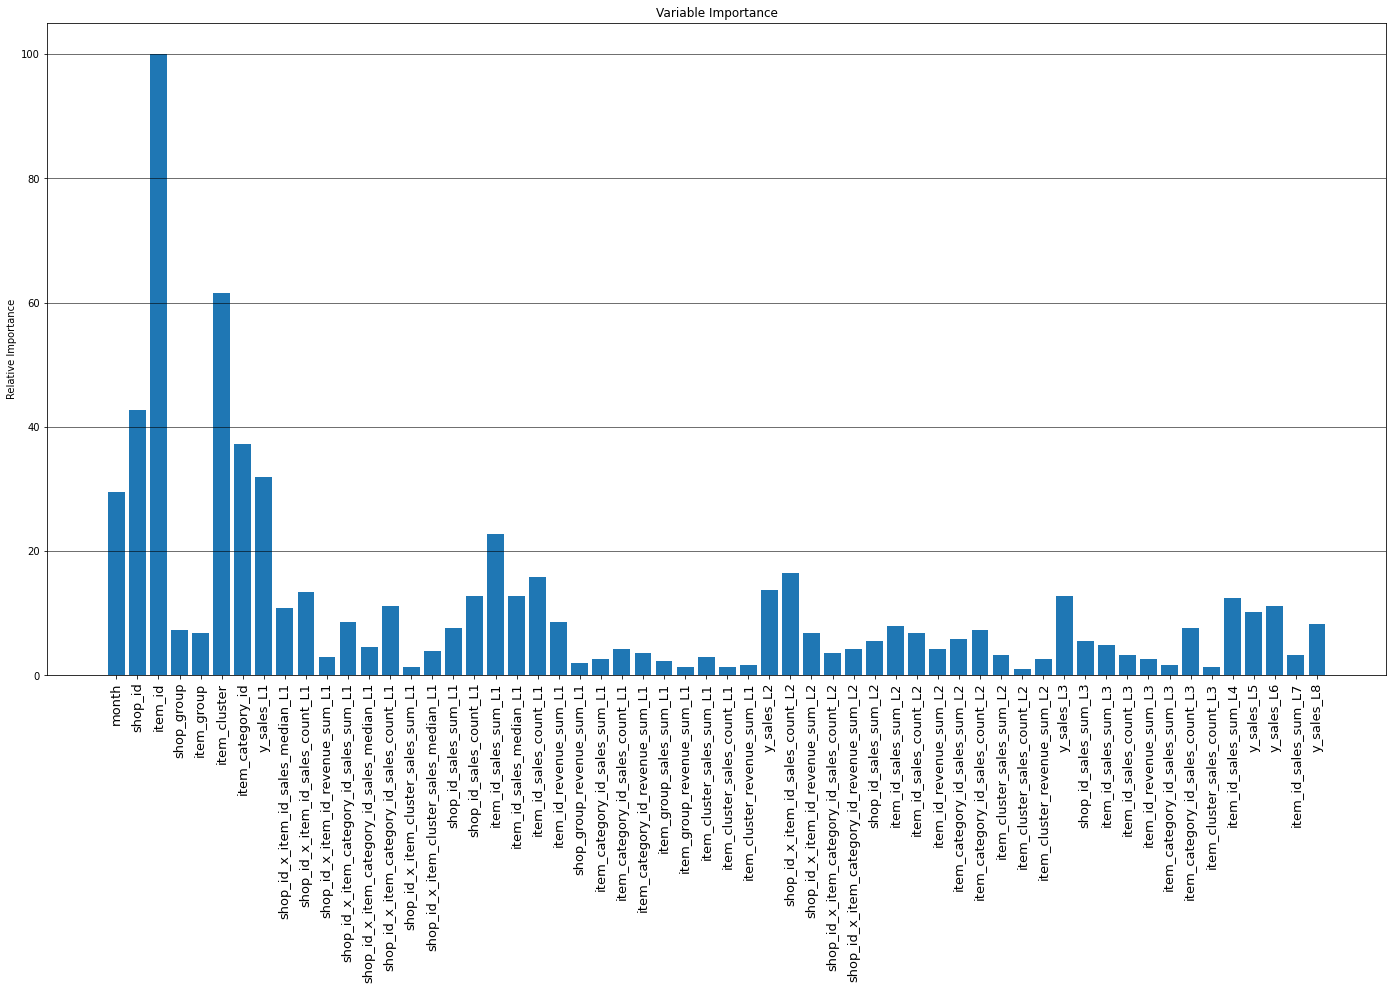

In [ ]:
#@title
# Plot feature importance - Results Visualization
itercount=0
if ITERS.at[itercount,'_model_type'] == 'LGBM':
    print_threshold = 25
    feature_importances_ = ITERS.at[itercount,'feature_importances_']
    feature_name_        = ITERS.at[itercount,'feature_name_']
    fi = pd.DataFrame(zip(feature_name_,feature_importances_),columns=['feature','value'])
    fi = fi.sort_values('value',ascending=False,ignore_index=True)
    fi['norm_value'] = round(100*fi.value / fi.value.max(),2)
    fi['lag'] = fi.feature.apply(lambda x: (x.split('L')[-1]) if len(x.split('L'))> 1 else 0)
    fi['feature_base'] = fi.feature.apply(lambda x: x.split('_L')[0])
    print(fi.iloc[list(range(0,8))+list(range(-7,0)),:]) #[[1,3,5,7,-7,-5]][:])
    # model_name_fi = ITERS.at[itercount,'_model_type']+ITERS.at[itercount,'_model_name_base'] + "_feature_importance.csv"
    # fi.to_csv("./models_and_predictions/" + model_name_fi, index=False)
    # printout to assist with removing low-importance features for following runs
    if fi.norm_value.min() < print_threshold:
        fi_low = fi[fi.norm_value < print_threshold]
        fi_low = fi_low.sort_values(['lag','norm_value'])
        fi_low.norm_value = fi_low.norm_value.apply(lambda x: f'{round(x):d}')
        fi_low['lag_feature_importance'] = fi_low.apply(lambda x: f"{f'L{x.lag} fi{x.norm_value}':{len(x.feature_base)}s}",axis=1)
        print(fi_low.lag_feature_importance.to_list())
        print(fi_low.feature_base.to_list())
    # make importances relative to max importance
    feature_importances_ = 100.0 * (feature_importances_ / feature_importances_.max())
    sorted_idx = np.arange(feature_importances_.shape[0])
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(24,12)) 
    plt.bar(pos, feature_importances_[sorted_idx], align='center')
    plt.xticks(pos, feature_name_[sorted_idx])
    plt.ylabel('Relative Importance')
    plt.title('Variable Importance')
    plt.tick_params(axis='x', which='major', labelsize = 13, labelrotation=90)
    plt.grid(True,which='major',axis='y')
    plt.tick_params(axis='y', which='major', grid_color='black',grid_alpha=0.7)
    # plt.savefig('LGBM_feature_importance_v1.4_mg.png')
    plt.show()

##**Document Results**

In [ ]:
#@title
# Printout for copy-paste version control

print('\n------------------------------------------\n------------------------------------------')
print(f'{FEATURES["_MODEL_NAME"]}  Model Type: {FEATURES["_MODEL_TYPE"]}\nCoursera: \n------------------------------------------')
display_params()
print('------')
print(ensemble_scores)
print('------')
print(ensemble_scores.describe(percentiles=[], include=np.number))
print(f'------\nHighest and Lowest Feature Importance for Final Model:\n{fi.iloc[list(range(0,8))+list(range(-7,0)),:]}\n------')
print(y_submission.head(8))
print('------------------------------------------\n\n')



------------------------------------------
------------------------------------------
['LGBMv13_15b_ens']  Model Type: ['LGBM']
Coursera: 
------------------------------------------
Sat 17:19:00 07/18/20;  df_size = 710.7 MB, df_shape = (6226880, 59);  N Models Trained in this run: 2
STT_COLUMN_ORDER = ['month', 'sales', 'revenue', 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
STATS_FEATURES = [['shop_id', 'item_id'], ['shop_id', 'item_category_id'], ['shop_id', 'item_cluster'], 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
STATISTICS = OrderedDict([('sales', ['sum', 'median', 'count']), ('revenue', ['sum'])]);  SALES_TRAIN_CLIP_L = 0, SALES_PREDICT_CLIP_L = 0
SHOPS_TO_DELETE = [9, 20]; ITEM_CATS_TO_DELETE = [8, 10, 32, 59, 80, 81, 82]; SCALE_MONTH = week_retail_weight
LAGS = [1, 2, 3, 4, 5, 6, 7, 8] (months)
COLUMNS_TO_LAG[1] = ['y_sales', 'shop_id_x_item_id_sales_median', 'shop_id_x_item_id_sales_count',

##**Stop Execution / Ensemble**

In [ ]:
#@title
# Dummy cell to stop the execution so we don't run any of the random code below (if we select "Run All", e.g.)
b4 = b5

NameError: ignored

In [ ]:
#@title
'''

Best Coursera score so far: 8/10 public and private LB scores are: 0.985186 and 0.979359 on 5/12 with Andreas' numbers
Best with this model: v7_ens21 8/10 public and private LB scores are: 0.974590 and 0.971219

LGBMv10_15ens 8/10 public and private LB scores are: 0.984054 and 0.979126
* LGBMv10_13ens 8/10 public and private LB scores are: 0.976077 and 0.973442
* LGBMv10_11ens 8/10 public and private LB scores are: 0.977330 and 0.974200  same as v10_10ens, but removed all features with importance below 20%
*** LGBMv10_10ens 8/10 public and private LB scores are: 0.975422 and 0.971682
LGBMv10_09ens 8/10 public and private LB scores are: 0.984677 and 0.984238
LGBMv10_08ens 8/10 public and private LB scores are: 0.984238 and 0.982864
LGBMv10_07ens 8/10 public and private LB scores are: 0.985275 and 0.985093
LGBMv10_06ens 8/10 public and private LB scores are: 0.984912 and 0.983360
LGBMv10_v9_18noscaler 8/10 8/10 public and private LB scores are: 0.984643 and 0.985256
LGBMv10_v9_18 8/10 public and private LB scores are: 0.982740 and 0.983633  robust scaler used
LGBMv9_18ens 8/10 public and private LB scores are: 0.984137 and 0.984686
LGBMv9_09clip 8/10 public and private LB scores are: 0.984877 and 0.985790
LGBMv9_08clip 8/10 public and private LB scores are: 0.985158 and 0.986282
LGBMv9_04ens (less memory) 8/10 public and private LB scores are: 0.981707 and 0.985473
* LGBMv9_03ens 8/10 public and private LB scores are: 0.975438 and 0.973606
LGBMv8_v7_21B_ens 8/10 public and private LB scores are: 0.976147 and 0.972920
*** LGBMv6v7_bag06 8/10 public and private LB scores are: 0.974873 and 0.971385
* LGBMv6v7_bag05 8/10 public and private LB scores are: 0.975973 and 0.972537
**** v7_ens21 8/10 public and private LB scores are: 0.974590 and 0.971219
** v7_ens20 8/10 public and private LB scores are: 0.975499 and 0.971916
* v6_ens32 8/10 public and private LB scores are: 0.975826 and 0.972352
v6_10 8/10 public and private LB scores are: 0.984495 and 0.978631
v6_ens01 (avg v6 #17 through #31): 8/10 public and private LB scores are: 0.984457 and 0.978061
v6_ens33 8/10 public and private LB scores are: 0.980232 and 0.975554
v7_03 8/10 public and private LB scores are: 0.980832 and 0.975157
v7_ens07 8/10 public and private LB scores are: 0.980749 and 0.978082

------------------------------------------
------------------------------------------
LGBMv10_15ens  Model Type: LGBM
------------------------------------------
Coursera: 8/10 public and private LB scores are: 0.984054 and 0.979126
Wed 19:10:11 07/15/20;  Size of df = 734.8 MB, Shape = (6226880, 59);  Size of X_train_np = 595.7 MB;  N Training Runs for this Model: 2
EDA_DELETE_SHOPS = [9, 20]; EDA_DELETE_ITEM_CATS = [8, 10, 32, 59, 80, 81, 82]; EDA_SCALE_MONTH = week_retail_weight; Lags(months) = [1, 2, 3, 4, 5, 6, 7, 8]
KEEP_STT_COLUMN_ORDER = ['month', 'sales', 'revenue', 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
STATS_FEATURES = [['shop_id', 'item_id'], ['shop_id', 'item_category_id'], ['shop_id', 'item_cluster'], 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster']
AGG_STATS = OrderedDict([('sales', ['sum', 'median', 'count']), ('revenue', ['sum'])]); _CLIP_TRAIN_L = 0; _CLIP_TRAIN_H = 20; _CLIP_PREDICT_L = 0; _CLIP_PREDICT_H = 20
COLUMNS_TO_LAG[1] = ['y_sales', 'shop_id_x_item_id_sales_median', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_median', 'shop_id_x_item_category_id_sales_count', 'shop_id_x_item_cluster_sales_sum', 'shop_id_x_item_cluster_sales_median', 'shop_id_sales_sum', 'shop_id_sales_count', 'item_id_sales_sum', 'item_id_sales_median', 'item_id_sales_count', 'item_id_revenue_sum', 'shop_group_revenue_sum', 'item_category_id_sales_sum', 'item_category_id_sales_count', 'item_category_id_revenue_sum', 'item_group_sales_sum', 'item_group_revenue_sum', 'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']
COLUMNS_TO_LAG[2] = ['y_sales', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 'shop_id_x_item_category_id_sales_count', 'shop_id_x_item_category_id_revenue_sum', 'shop_id_sales_sum', 'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 'item_category_id_sales_sum', 'item_category_id_sales_count', 'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']
COLUMNS_TO_LAG[3] = ['y_sales', 'shop_id_sales_sum', 'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 'item_category_id_sales_sum', 'item_category_id_sales_count', 'item_cluster_sales_count']
COLUMNS_TO_LAG[4] = ['item_id_sales_sum']
COLUMNS_TO_LAG[5] = ['y_sales']
COLUMNS_TO_LAG[6] = ['y_sales']
COLUMNS_TO_LAG[7] = ['item_id_sales_sum']
COLUMNS_TO_LAG[8] = ['y_sales']
CARTPROD_FILL_MONTH_BEGIN = 13; TRAIN_MONTH_START = [13]; TRAIN_FINAL_MONTH = [29]; N_VAL_MONTHS = [False]; USE_CARTESIAN_FILL = True; CART_PROD_INCLUDES_TEST = False; CARTPROD_FILLNA_WITH_0 = True
USE_ROBUST_SCALER = True; ROBUST_SCALER_QUANTILES = (20, 80); USE_MINMAX_SCALER = True; MINMAX_RANGE = (0, 32000); DATA_TYPE = <class 'numpy.int16'>
LEARNING_RATE = [0.02, 0.005]; MAX_ITERATIONS = [8000]; EARLY_STOPPING = [200]; REGULARIZATION = [0.4]; SEED_VALUES = [42]
------
     lr   reg  max_iter  estop  start  end  n_val_mo  seed  trR2  valR2  tr_rmse  val_rmse  best_iter  best_val_rmse model_time predict_time total_time
0 0.020 0.400      8000    200     13   29     False    42 0.572  0.427    0.743     0.783          0      1,253.473   00:35:36     00:13:33   00:49:09
1 0.005 0.400      8000    200     13   29     False    42 0.549  0.427    0.763     0.784          0      1,254.303   01:24:53     00:35:09   02:00:02
------
         lr   reg  max_iter  estop  start  end  seed  trR2  valR2  tr_rmse  val_rmse  best_iter  best_val_rmse
count     2     2         2      2      2    2     2     2      2        2         2          2              2
mean  0.013 0.400      8000    200     13   29    42 0.561  0.427    0.753     0.784          0      1,253.888
std   0.011     0         0      0      0    0     0 0.017  0.001    0.014     0.000          0          0.587
min   0.005 0.400      8000    200     13   29    42 0.549  0.427    0.743     0.783          0      1,253.473
50%   0.013 0.400      8000    200     13   29    42 0.561  0.427    0.753     0.784          0      1,253.888
max   0.020 0.400      8000    200     13   29    42 0.572  0.427    0.763     0.784          0      1,254.303
------
Highest and Lowest Feature Importance for Final Model:
                             feature  value  norm_value lag                   feature_base
0             item_id_sales_count_L1   9378         100   1            item_id_sales_count
1               item_id_sales_sum_L1   9199      98.090   1              item_id_sales_sum
2                       item_cluster   8256      88.040   0                   item_cluster
3                            item_id   7862      83.830   0                        item_id
4                   item_category_id   7540      80.400   0               item_category_id
5             item_id_revenue_sum_L1   7261      77.430   1            item_id_revenue_sum
6                            shop_id   6958      74.190   0                        shop_id
7                         y_sales_L1   6754      72.020   1                        y_sales
51       item_cluster_sales_count_L2   2536      27.040   2       item_cluster_sales_count
52              item_id_sales_sum_L3   2535      27.030   3              item_id_sales_sum
53  shop_id_x_item_id_sales_count_L2   2293      24.450   2  shop_id_x_item_id_sales_count
54   item_category_id_sales_count_L3   2170      23.140   3   item_category_id_sales_count
55       item_cluster_sales_count_L3   2067      22.040   3       item_cluster_sales_count
56   item_category_id_sales_count_L2   1987      21.190   2   item_category_id_sales_count
57     item_category_id_sales_sum_L3   1879      20.040   3     item_category_id_sales_sum
------
   ID  item_cnt_month
0   0           0.781
1   1           0.079
2   2           1.174
3   3           0.247
4   4           0.875
5   5           0.697
6   6           0.514
7   7           0.095
------------------------------------------
------------------------------------------
------------------------------------------

'''
nocode=True

##**Averaging Several Stored Prediction/Submission Files**

In [ ]:
#@title
# average several submission files to get ensemble average
%cd "{GDRIVE_REPO_PATH}"
# source_dir = Path('models_and_predictions/bagging_LGBM')
# prediction_files = source_dir.iterdir()
source_dir = 'models_and_predictions/bagging_LGBM'
prediction_files = os.listdir(source_dir)
print("Loading Files from Google Drive repo into Colab...\n")

# filename to save ensemble average predictions for submission
ensemble_name = 'LGBMv6v7_bag06'

print(f'filename {ensemble_name}')
# Loop to load the data files into appropriately-named pandas DataFrames, and save in np array for easy calc of ensemble average
preds = []
for f_name in prediction_files:
    filename = f_name.rsplit("/")[-1]
    data_frame_name = filename.split(".")[0][:-11]
    path_name = os.path.join('models_and_predictions/bagging_LGBM/'+ filename)
    exec(data_frame_name + " = pd.read_csv(path_name)")
    print(f'Data Frame: {data_frame_name}; n_rows = {len(eval(data_frame_name))}, n_cols = ')
    preds.append(eval(data_frame_name).item_cnt_month.to_numpy())

# Simple ensemble averaging
pred_ens_avg = np.mean(preds, axis=0)
ensemble_submission = LGBMv6mg_17_.copy(deep=True)
ensemble_submission.item_cnt_month = pred_ens_avg

ensemble_submission.to_csv("./models_and_predictions/" + ensemble_name + '_submission.csv', index=False)

display(ensemble_submission.head(8))
print(f'filename {ensemble_name} saved: {strftime("%a %X %x")}')
print('Coursera:  ')

#**Useful Code Snippets**

In [ ]:
#@title

# FEATURES["_CARTPROD_FILLNA0"]         = ITERS["_cartprod_fillna0"]
# FEATURES["_CARTPROD_FIRST_MONTH"]     = ITERS["_cartprod_first_month"]
# FEATURES["_CARTPROD_TEST_PAIRS"]      = ITERS["_cartprod_test_pairs"]
# FEATURES["_CLIP_TRAIN_H"]             = ITERS["_clip_train_H"]            
# FEATURES["_CLIP_TRAIN_L"]             = ITERS["_clip_train_L"]                   
# FEATURES["_CLIP_PREDICT_H"]           = ITERS["_clip_predict_H"]          
# FEATURES["_CLIP_PREDICT_L"]           = ITERS["_clip_predict_L"]    
# FEATURES["_EDA_DELETE_SHOPS"]         = ITERS["_eda_delete_shops"]
# FEATURES["_EDA_DELETE_ITEM_CATS"]     = ITERS["_eda_delete_item_cats"]
# FEATURES["_EDA_SCALE_MONTH"]          = ITERS["_eda_scale_month"]
# FEATURES["_FEATURE_DATA_TYPE"]        = ITERS["_feature_data_type"]
# FEATURES["_MINMAX_SCALER_RANGE"]      = ITERS["_minmax_scaler_range"]
# FEATURES["_MODEL_NAME_BASE"]          = ITERS["_model_name_base"]
# FEATURES["_MODEL_TYPE"]               = ITERS["_model_type"]
# FEATURES["_ROBUST_SCALER_QUANTILES"]  = ITERS["_robust_scaler_quantiles"]     
# FEATURES["_TEST_MONTH"]               = ITERS["_test_month"]
# FEATURES["_TRAIN_START_MONTH"]        = ITERS["_train_start_month"]
# FEATURES["_TRAIN_FINAL_MONTH"]        = ITERS["_train_final_month"]
# FEATURES["_USE_CARTPROD_FILL"]        = ITERS["_use_cartprod_fill"]
# FEATURES["_USE_CATEGORICAL"]          = ITERS["_use_categorical"]         
# FEATURES["_USE_ROBUST_SCALER"]        = ITERS["_use_robust_scaler"]      
# FEATURES["_USE_MINMAX_SCALER"]        = ITERS["_use_minmax_scaler"]
# FEATURES["_VALIDATE_KEY"]             = ITERS["_validate_key"]

# pprint.pprint(ITERS,width=200,compact=True)
# pprint.pprint(ALL_RUN_PARAMETERS,width=200,compact=True)

print(ITERS[['random_state','n_estimators','boosting_type','metric']].iloc[0].to_list())   # selecting only certain variables from a certain iteration line (0 in this case)



class Delete_Me:
    def __init__(self, name, df):
        self.name = name
        self.df = df
    def clear_memory(self,dataframe):
        print(f'Removing {self.name}')
        del dataframe
        gc.collect()
        #dataframe = pd.DataFrame(np.zeros((1,1),dtype=np.int8)) # not sure whether this line really helps
        return True

def rm_df(rm_dict={'df':pd.DataFrame()}):
    """
    try to save memory by deleting unneeded dataframes
    input is a dictionary of dataframe string names as keys, and dataframes as values
    """
    print(f'\nPrior to df delete, Google Colab runtime is using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM\n')
    for k,v in rm_dict.items():
        rm_df_class = Delete_Me(k,v)
        rm_df_class.clear_memory(v)
        v = pd.DataFrame(np.zeros((1,1),dtype=np.int8))
        # try: del v
        # except: print(f'DataFrame {k} delete error.')
    #gc.disable()
    #gc.collect()
    print(f'\nAfter gc.collect(), Google Colab runtime is using {virtual_memory().used / 1e9:.1f} GB of {virtual_memory().total / 1e9:.1f} GB available RAM\n')
    return 




###**Old code: LightGBM - Lightweight Gradient-Boosted Decision Tree**
###**Old code: SK_HGBR - SKLearn Histogram Gradient Boosting Regressor**

In [ ]:
#@title

# model_gbdt = lgb.LGBMRegressor(
#     objective='regression',
#     boosting_type='gbdt',           # gbdt= Gradient Boosting Decision Tree; dart= Dropouts meet Multiple Additive Regression Trees; goss= Gradient-based One-Side Sampling; rf= Random Forest
#     learning_rate=params["lr"],     # You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback
#     n_estimators=params["maxit"],   # Number of boosted trees to fit = max_iterations
#     metric='rmse',
#     subsample_for_bin=200000,       # Number of samples for constructing bins
#     num_leaves=31,                  # Maximum tree leaves for base learners
#     max_depth=-1,                   # Maximum tree depth for base learners, <=0 means no limit
#     min_split_gain=0.0,             # Minimum loss reduction required to make a further partition on a leaf node of the tree
#     min_child_weight=0.001,         # Minimum sum of instance weight (hessian) needed in a child (leaf)
#     min_child_samples=20,           # Minimum number of data needed in a child (leaf)
#     colsample_bytree=params["reg"], # dropout fraction of columns during fitting (max=1 = no dropout)
#     random_state=params["seed"],    # seed value
#     silent=False,                   # whether to print info during fitting
#     importance_type='split',        # feature importance type: 'split'= N times feature is used in model; 'gain'= total gains of splits which use the feature
#     reg_alpha=0.0,                  # L1 regularization
#     reg_lambda=0.0,                 # L2 regularization
#     n_jobs=- 1,                     # N parallel threads to use on computer
#     subsample=1.0,                  # row fraction used for training: keep at 1 for time series data
#     subsample_freq=0                # keep at 0 for time series
#     )


# model_gbdt.fit( 
#     data['X_train'],                        # Input feature matrix (array-like or sparse matrix of shape = [n_samples, n_features])
#     data['y_train'],                        # The target values (class labels in classification, real numbers in regression) (array-like of shape = [n_samples])
#     eval_set=[(data['X_val'], data['y_val'])],              # can have multiple tuples of validation data inside this list
#     eval_names=None,                        # Names of eval_set (list of strings or None, optional (default=None))
#     eval_metric='rmse',                     # Default: 'l2' (= mean squared error, 'mse') for LGBMRegressor; options include 'l2_root'='root_mean_squared_error'='rmse' and 'l1'='mean_absolute_error'='mae' + more
#     early_stopping_rounds=params["estop"],  # Activates early stopping. The model will train until the validation score stops improving. Validation score needs to improve at least every early_stopping_rounds 
#                                             #     to continue training. Requires at least one validation data and one metric. If there’s more than one, will check all of them. But the training data is ignored anyway. 
#                                             #     To check only the first metric, set the first_metric_only parameter to True in additional parameters **kwargs of the model constructor.
#     init_score=None,                        # Init score of train data
#     eval_init_score=None,                   # Init score of eval data (list of arrays or None, optional (default=None))
#     verbose=CONSTANTS["VERBOSITY"] ,        # If True, metric on the eval set is printed at each boosting stage. If n=int, the metric on the eval set is printed at every nth boosting stage. Best and final also print.
#     feature_name='auto',                    # Feature names. If 'auto' and data is pandas DataFrame, data columns names are used. (list of strings or 'auto', optional (default='auto'))
#     categorical_feature='auto',             # Categorical features (list of strings or int, or 'auto', optional (default='auto')) If list of int, interpreted as indices. 
#                                             # If list of strings, interpreted as feature names (need to specify feature_name as well). 
#                                             # If 'auto' and data is pandas DataFrame, pandas unordered categorical columns are used. All values in categorical features should be less than int32 max value (2147483647). 
#                                             # Large values could be memory-consuming. Consider using consecutive integers starting from zero. All negative values in categorical features are treated as missing values.
#     callbacks=None                          # List of callback functions that are applied at each iteration (list of callback functions or None, optional (default=None)) See Callbacks in Python API for more information.
#     )

    # if mod_type == 'HGBR':
    #     # TTSplit should use TRAIN_FINAL = 33 (train on all data), and it will return also val=month33 for calculation at end (only)
    #     model_gbdt = HistGradientBoostingRegressor(
    #         learning_rate=LR, 
    #         max_iter=maxiter, 
    #         l2_regularization = reg,
    #         early_stopping=False, 
    #         verbosity = verb,
    #         random_state=seed_val)
    
    #     tic = perf_counter()
    #     model_gbdt.fit(X_train_np, y_train)
    #     toc = perf_counter()
    #     model_fit_time = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
    #     print(f"model HGBR fit time: {model_fit_time}")
    #     best_iter = maxiter
    #     best_val_rmse = 0
# model_params = {
        #         'objective':param_df.at[iternum,'objective'],
        #         'boosting_type':param_df.at[iternum,'boosting_type'],
        #         'learning_rate':param_df.at[iternum,'learning_rate'],
        #         'n_estimators':param_df.at[iternum,'n_estimators'],
        #         'metric':param_df.at[iternum,'metric'],
        #         'subsample_for_bin':param_df.at[iternum,'subsample_for_bin'],
        #         'num_leaves':param_df.at[iternum,'num_leaves'],
        #         'max_depth':param_df.at[iternum,'max_depth'],
        #         'min_split_gain':param_df.at[iternum,'min_split_gain'],
        #         'min_child_weight':param_df.at[iternum,'min_child_weight'],
        #         'min_child_samples':param_df.at[iternum,'min_child_samples'],
        #         'colsample_bytree':param_df.at[iternum,'colsample_bytree'],
        #         'random_state':param_df.at[iternum,'random_state'],
        #         'silent':param_df.at[iternum,'silent'],
        #         'importance_type':param_df.at[iternum,'importance_type'],
        #         'reg_alpha':param_df.at[iternum,'reg_alpha'],
        #         'reg_lambda':param_df.at[iternum,'reg_lambda'],
        #         'n_jobs':param_df.at[iternum,'n_jobs'],
        #         'subsample':param_df.at[iternum,'subsample'],
        #         'subsample_freq':param_df.at[iternum,'subsample_freq']
                # }

        # fit_params = {
        #         'eval_metric':param_df.at[iternum,'eval_metric'],
        #         'early_stopping_rounds':param_df.at[iternum,'early_stopping_rounds'],
        #         'init_score':param_df.at[iternum,'init_score'],
        #         'eval_init_score':param_df.at[iternum,'eval_init_score'],
        #         'verbose':param_df.at[iternum,'verbose'],
        #         'feature_name':param_df.at[iternum,'feature_name'],
        #         'categorical_feature':param_df.at[iternum,'categorical_feature'],
        #         'callbacks':param_df.at[iternum,'callbacks']
        #         }

        # param_df.at[iternum,"feature_name_"]            = model_gbdt.feature_name_




# # Parameters Dictionary stores everything for dumping to file later
# SPEC = OrderedDict()
# FEATURES["_MODEL_NAME"] = 'LGBMv13_15ens'   # 'LGBMv10_11ens'  # Name of file model substring to save data submission to (= False if user to input it below)
# FEATURES["_MODEL_TYPE"] = 'LGBM'  # 'HGBR'
# FEATURES["_TEST_MONTH"] = 34

# # Optional operations to delete irrelevant shops or item categories, and to scale sales by month length, etc.;  set to FALSE if no operation desired
# FEATURES["_EDA_DELETE_SHOPS"]     = [9,20] #[0,1,8,9,11,13,17,20,23,27,29,30,32,33,40,43,51,54] #[8, 9, 13, 20, 23, 32, 33, 40] # [9,20] #  # False # these are online shops, untested shops, and early-termination + online shops
# FEATURES["_EDA_DELETE_ITEM_CATS"] = [8, 10, 32, 59, 80, 81, 82]  #[1,4,8,10,13,14,17,18,32,39,46,48,50,51,52,53,59,66,68,80,81,82] #  #[8, 80, 81, 82]  # False # hokey categories, untested categories, really hokey categories
# FEATURES["_EDA_SCALE_MONTH"]         = 'week_retail_weight'  # False # scale sales by days in month, number of each weekday, and Russian recession retail sales index

# # columns to keep for this round of modeling (dropping some of the less important features to save memory):
# FEATURES["COLS_KEEP_ITEMS"]             = ['item_id', 'item_group', 'item_cluster', 'item_category_id']  #, 'item_category4']
# FEATURES["COLS_KEEP_SHOPS"]             = ['shop_id','shop_group']
# FEATURES["COLS_KEEP_DATE_SCALING"]      = ['month', 'days_in_M', 'weekday_weight', 'retail_sales', 'week_retail_weight']
# FEATURES["COLS_KEEP_BASE_TRAIN_TEST"]   = ['month', 'price', 'sales', 'shop_id', 'item_id']

# # re-order columns for organized readability, for the (to be created) combined sales-train-test (stt) dataset
# FEATURES["COLS_ORDER_STT"]        = ['month', 'sales', 'revenue', 'shop_id', 'item_id', 'shop_group', 'item_category_id', 'item_group', 'item_cluster'] #,   'revenue','item_category4','shop_group'
# FEATURES["PROVIDED_INTEGER_FEATURES"]        = [e for e in FEATURES["COLS_ORDER_STT"] if e not in {'sales','price','revenue'}]  
# FEATURES["FEATURES_MONTHLY_STT_START"]       = [e for e in FEATURES["COLS_ORDER_STT"] if e not in {'month','sales','price','revenue','shop_id','item_id'}]  # these are categorical features that need to be merged onto test data set
# FEATURES["PROVIDED_CATEGORICAL_FEATURES"]    = [e for e in FEATURES["COLS_ORDER_STT"] if e not in {'month','sales','price','revenue'}]
# FEATURES["_USE_CATEGORICAL"]         = True  # pd dataframe columns "PROVIDED_CATEGORICAL_FEATURES" are changed to categorical dtype just before model fitting/creation

# FEATURES["AGG_STATS"] = OrderedDict()
# FEATURES["AGG_STATS"]["sales"]     = ['sum', 'median', 'count']
# FEATURES["AGG_STATS"]["revenue"]   = ['sum']  # revenue can handle fillna(0) cartesian product; price doesn't make sense with fillna(0), so don't use that at this time
# #FEATURES["AGG_STATS"]["price"]     = ['median','std']

# # aggregate statistics columns (initial computation shall be 'sales per month' prediction target for shop_id-item_id pair grouping)
# FEATURES["STATS_FEATURES"] = [['shop_id', 'item_id'], ['shop_id', 'item_category_id'], ['shop_id', 'item_cluster']] + FEATURES["PROVIDED_CATEGORICAL_FEATURES"]

# FEATURES["LAGS_MONTHS"] = [1,2,3,4,5,6,7,8]  # month lags to include in model 
# FEATURES["LAG_FEATURES"] = {}
# for i in FEATURES["LAGS_MONTHS"]:
#     FEATURES["LAG_FEATURES"][i] = ['y_sales', 'shop_id_x_item_category_id_sales_sum', 'item_id_sales_sum', 'item_cluster_sales_sum'] 
# FEATURES["LAG_FEATURES"][1] = ['y_sales', 'shop_id_x_item_id_sales_median', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 
#                      'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_median', 'shop_id_x_item_category_id_sales_count', 
#                      'shop_id_x_item_cluster_sales_sum', 'shop_id_x_item_cluster_sales_median', 
#                      'shop_id_sales_sum', 'shop_id_sales_count', 
#                      'item_id_sales_sum', 'item_id_sales_median', 'item_id_sales_count', 'item_id_revenue_sum', 
#                      'shop_group_revenue_sum', 
#                      'item_category_id_sales_sum', 'item_category_id_sales_count', 'item_category_id_revenue_sum', 
#                      'item_group_sales_sum', 'item_group_revenue_sum', 
#                      'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']

# FEATURES["LAG_FEATURES"][2] = ['y_sales', 'shop_id_x_item_id_sales_count', 'shop_id_x_item_id_revenue_sum', 
#                      'shop_id_x_item_category_id_sales_sum', 'shop_id_x_item_category_id_sales_count', 'shop_id_x_item_category_id_revenue_sum', 
#                      'shop_id_x_item_cluster_sales_sum', 'shop_id_x_item_cluster_sales_count', 
#                      'shop_id_sales_sum', 'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 
#                      'item_category_id_sales_sum', 'item_category_id_sales_count', 
#                      'item_group_sales_sum', 
#                      'item_cluster_sales_sum', 'item_cluster_sales_count', 'item_cluster_revenue_sum']

# FEATURES["LAG_FEATURES"][3] = ['y_sales', 'shop_id_x_item_id_sales_count', 
#                      'shop_id_x_item_category_id_sales_sum', 
#                      'shop_id_sales_sum', 
#                      'item_id_sales_sum', 'item_id_sales_count', 'item_id_revenue_sum', 
#                      'item_category_id_sales_sum', 'item_category_id_sales_count', 
#                      'item_cluster_sales_sum', 'item_cluster_sales_count']

# # keep at least the highest importance feature for each lag, but remove all others with < 20% importance (month 13-32 training)
# FEATURES["LAG_FEATURES"][2] = [e for e in FEATURES["LAG_FEATURES"][2] if e not in {'item_group_sales_sum','shop_id_x_item_category_id_sales_sum','shop_id_x_item_cluster_sales_sum','shop_id_x_item_cluster_sales_count'}]
# FEATURES["LAG_FEATURES"][3] = [e for e in FEATURES["LAG_FEATURES"][3] if e not in {'item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum','shop_id_x_item_id_sales_count'}]
# FEATURES["LAG_FEATURES"][4] = [e for e in FEATURES["LAG_FEATURES"][4] if e not in {'shop_id_x_item_category_id_sales_sum','y_sales','item_cluster_sales_sum'}]
# FEATURES["LAG_FEATURES"][5] = [e for e in FEATURES["LAG_FEATURES"][5] if e not in {'item_cluster_sales_sum','item_id_sales_sum','shop_id_x_item_category_id_sales_sum'}]
# FEATURES["LAG_FEATURES"][6] = [e for e in FEATURES["LAG_FEATURES"][6] if e not in {'item_id_sales_sum','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]
# FEATURES["LAG_FEATURES"][7] = [e for e in FEATURES["LAG_FEATURES"][7] if e not in {'y_sales','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]
# FEATURES["LAG_FEATURES"][8] = [e for e in FEATURES["LAG_FEATURES"][8] if e not in {'item_id_sales_sum','item_cluster_sales_sum','shop_id_x_item_category_id_sales_sum'}]

# # LAG_STATS_SET is SET of all aggregate statistics columns for all lags (allows us to shed the other stats, keeping memory requirements low)
# LAG_STATS_SET = FEATURES["LAG_FEATURES"][1]
# for l in FEATURES["LAGS_MONTHS"][1:]:
#     LAG_STATS_SET = LAG_STATS_SET + [x for x in FEATURES["LAG_FEATURES"][l] if x not in LAG_STATS_SET]
# FEATURES["STT_MONTHLY_COLS"] = FEATURES["PROVIDED_INTEGER_FEATURES"] + LAG_STATS_SET

# # Define various constants that drive the attributes of the various features
# FEATURES["_CLIP_TRAIN_H"]   = 20          # this clips sales after doing monthly groupings (monthly_stt dataframe) will also clip item_cnt_month predictions to 20 after the model runs
# FEATURES["_CLIP_TRAIN_L"]   = 0                   
# FEATURES["_CLIP_PREDICT_H"] = 20          # this clips the final result before submission to coursera
# FEATURES["_CLIP_PREDICT_L"] = 0    

# FEATURES["_USE_ROBUST_SCALER"]         = True        # scale features to reduce influence of outliers
# FEATURES["_ROBUST_SCALER_QUANTILES"]   = (20,80)
# FEATURES["_USE_MINMAX_SCALER"]         = True        # scale features to use large range of np.int16
# FEATURES["_MINMAX_SCALER_RANGE"]       = (0,16000)   # int16 = (0,32700); uint16 = (0,65500)  --> keep this range positive for best results with LGBM; keep range smaller for faster LGBM fitting
# FEATURES["_FEATURE_DATA_TYPE"]         = np.int16    # np.float32 #np.int16   np.uint16          # if fill n/a = 0, can adjust feature values to be integer values and save memory (not finding that int can store np.NAN)
# FEATURES["_USE_CARTPROD_FILL"]         = True        # use cartesian fill, or not
# FEATURES["_CARTPROD_TEST_PAIRS"]  = False       # include all shop-item pairings from test month as well as the in-month pairings
# FEATURES["_CARTPROD_FILLNA0"]    = True        # fill n/a cartesian additions with zeros (not good for price-based stats, however)
# FEATURES["_CARTPROD_FIRST_MONTH"] = 13          # month number + max lag to start adding Cartesian product rows (i.e., maxlag=6mo and CARTPROD_FILL_MONTH_BEGIN=10 will cartesian fill from 4 to 33)
# FEATURES["TRAIN_MONTH_START"]         = [13]        # == 24 ==> less than a year of data, but avoids December 'outlier' of 2014
# FEATURES["TRAIN_MONTH_END"]           = [29]        # [29,32] #,30,32]
# FEATURES["N_VAL_MONTHS"]              = [False]     #1 # ; if false, val is all months after training, up to and including 33; otherwise val is this many months after train_month_end

# # Define hyperparameters for modeling
# FEATURES["LEARNING_RATE"]       = [0.05]  # default = 0.1
# FEATURES["MAX_ITERATIONS"]      = [200] # default = 100
# FEATURES["EARLY_STOPPING"]      = [20]
# FEATURES["REGULARIZATION"]      = [0.4] # default = 1 for LGBM, 0 for HGBR (these models use inverse forms of regularization)
# FEATURES["VERBOSITY"]           = True #4 four is to print every 4th iteration; True is every iteration; False is no print except best and last
# FEATURES["SEED_VALUES"]         = [42]

# FEATURES["N_TRAIN_MODELS"] = (len(FEATURES["SEED_VALUES"])*len(FEATURES["N_VAL_MONTHS"])*len(FEATURES["TRAIN_MONTH_END"])*len(FEATURES["TRAIN_MONTH_START"])*
#                          len(FEATURES["EARLY_STOPPING"])*len(FEATURES["MAX_ITERATIONS"])*len(FEATURES["REGULARIZATION"])*len(FEATURES["LEARNING_RATE"]) )


# print(f'Done: {strftime("%a %X %x")}')








# def unscale(scaler,target):
#     return scaler.inverse_transform(target.reshape(-1, 1)).squeeze()

# def GBDT_model(data=df, CONSTANTS=SPEC, params=OrderedDict()):
#     """
#     data is entire dataframe with train, validation, and test rows, and all columns including target prediction at "y_target"
#     constants is dictionary of setup constants
#     params is dictionary of this particular model train/val split and model fitting/prediction parameters
#     """
#     results = OrderedDict()
#     if CONSTANTS["_MODEL_TYPE"] == 'LGBM':
        
#         train_start = params["train_start_mo"]
#         train_end   = params["train_final_mo"]
#         val_months  = params["val_mo"]
#         test_month  = CONSTANTS["TEST_MONTH"]

#         train   = data.query('(month >= @train_start) & (month <= @train_end)')
#         y_train = train['y_target'].astype(np.float32)
#         y_train = y_train.reset_index(drop=True)
#         X_train = train.drop(['y_target'], axis=1)
#         X_train = X_train.reset_index(drop=True)
#         feature_names = X_train.columns

#         if val_months:
#             val = data.query('(month > (@train_end)) & (month <= (@train_end + @val_months)) & (month < @test_month)')
#         else:
#             val = data.query('((month > (@train_end)) & (month < @test_month)) | (month == (@test_month-1))')
#         y_val = val['y_target'].astype(np.float32)
#         y_val = y_val.reset_index(drop=True)
#         X_val = val.drop(['y_target'], axis=1)
#         X_val = X_val.reset_index(drop=True)

#         X_test = data.query('month == @test_month').drop(['y_target'], axis=1)
#         X_test = X_test.reset_index(drop=True)

#         print('X_train:')
#         print_col_info(X_train,8)
#         print(f'\n{X_train.head(2)}\n\n')
#         print('X_val:')
#         print_col_info(X_val,8)
#         print(f'\n{X_val.head(2)}\n\n')
#         print('X_test:')
#         print_col_info(X_test,8)
#         print(f'\n{X_test.head(2)}\n\n')
#         data_types = X_train.dtypes

#         del [[data, train, val]]

#         print('Starting training...')
#         model_gbdt = lgb.LGBMRegressor(
#             objective='regression',
#             boosting_type='gbdt',           # gbdt= Gradient Boosting Decision Tree; dart= Dropouts meet Multiple Additive Regression Trees; goss= Gradient-based One-Side Sampling; rf= Random Forest
#             learning_rate=params["lr"],     # You can use callbacks parameter of fit method to shrink/adapt learning rate in training using reset_parameter callback
#             n_estimators=params["maxit"],   # Number of boosted trees to fit = max_iterations
#             metric='rmse',
#             subsample_for_bin=200000,       # Number of samples for constructing bins
#             num_leaves=31,                  # Maximum tree leaves for base learners
#             max_depth=-1,                   # Maximum tree depth for base learners, <=0 means no limit
#             min_split_gain=0.0,             # Minimum loss reduction required to make a further partition on a leaf node of the tree
#             min_child_weight=0.001,         # Minimum sum of instance weight (hessian) needed in a child (leaf)
#             min_child_samples=20,           # Minimum number of data needed in a child (leaf)
#             colsample_bytree=params["reg"], # dropout fraction of columns during fitting (max=1 = no dropout)
#             random_state=params["seed"],    # seed value
#             silent=False,                   # whether to print info during fitting
#             importance_type='split',        # feature importance type: 'split'= N times feature is used in model; 'gain'= total gains of splits which use the feature
#             reg_alpha=0.0,                  # L1 regularization
#             reg_lambda=0.0,                 # L2 regularization
#             n_jobs=- 1,                     # N parallel threads to use on computer
#             subsample=1.0,                  # row fraction used for training: keep at 1 for time series data
#             subsample_freq=0,               # keep at 0 for time series
#             )

#         tic = perf_counter()
#         model_gbdt.fit( 
#             X_train,                                # Input feature matrix (array-like or sparse matrix of shape = [n_samples, n_features])
#             y_train,                                # The target values (class labels in classification, real numbers in regression) (array-like of shape = [n_samples])
#             eval_set=[(X_val, y_val)],              # can have multiple tuples of validation data inside this list
#             eval_names=None,                        # Names of eval_set (list of strings or None, optional (default=None))
#             eval_metric='rmse',                     # Default: 'l2' (= mean squared error, 'mse') for LGBMRegressor; options include 'l2_root'='root_mean_squared_error'='rmse' and 'l1'='mean_absolute_error'='mae' + more
#             early_stopping_rounds=params["estop"],  # Activates early stopping. The model will train until the validation score stops improving. Validation score needs to improve at least every early_stopping_rounds 
#                                                     #     to continue training. Requires at least one validation data and one metric. If there’s more than one, will check all of them. But the training data is ignored anyway. 
#                                                     #     To check only the first metric, set the first_metric_only parameter to True in additional parameters **kwargs of the model constructor.
#             init_score=None,                        # Init score of train data
#             eval_init_score=None,                   # Init score of eval data (list of arrays or None, optional (default=None))
#             verbose=CONSTANTS["VERBOSITY"] ,        # If True, metric on the eval set is printed at each boosting stage. If n=int, the metric on the eval set is printed at every nth boosting stage. Best and final also print.
#             feature_name='auto',                    # Feature names. If 'auto' and data is pandas DataFrame, data columns names are used. (list of strings or 'auto', optional (default='auto'))
#             categorical_feature='auto',             # Categorical features (list of strings or int, or 'auto', optional (default='auto')) If list of int, interpreted as indices. 
#                                                     # If list of strings, interpreted as feature names (need to specify feature_name as well). 
#                                                     # If 'auto' and data is pandas DataFrame, pandas unordered categorical columns are used. All values in categorical features should be less than int32 max value (2147483647). 
#                                                     # Large values could be memory-consuming. Consider using consecutive integers starting from zero. All negative values in categorical features are treated as missing values.
#             callbacks=None                          # List of callback functions that are applied at each iteration (list of callback functions or None, optional (default=None)) See Callbacks in Python API for more information.
#             )

#         toc = perf_counter()
#         results["model_fit_time"] = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
#         print(f'Model LGBM fit time: {results["model_fit_time"]}')
#         results["best_iter"] = model_gbdt.best_iteration_
#         results["best_val_rmse"] = 0 #best_score


#     # if mod_type == 'HGBR':
#     #     # TTSplit should use TRAIN_FINAL = 33 (train on all data), and it will return also val=month33 for calculation at end (only)
#     #     model_gbdt = HistGradientBoostingRegressor(
#     #         learning_rate=LR, 
#     #         max_iter=maxiter, 
#     #         l2_regularization = reg,
#     #         early_stopping=False, 
#     #         verbosity = verb,
#     #         random_state=seed_val)
    
#     #     tic = perf_counter()
#     #     model_gbdt.fit(X_train_np, y_train)
#     #     toc = perf_counter()
#     #     model_fit_time = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
#     #     print(f"model HGBR fit time: {model_fit_time}")
#     #     best_iter = maxiter
#     #     best_val_rmse = 0
        
#     print("Starting predictions...")
#     tic = perf_counter()
#     y_pred_train =  model_gbdt.predict( X_train, num_iteration=model_gbdt.best_iteration_ )
#     y_pred_val =    model_gbdt.predict( X_val,   num_iteration=model_gbdt.best_iteration_ )
#     y_pred_test =   model_gbdt.predict( X_test,  num_iteration=model_gbdt.best_iteration_ )
#     y_train =       y_train.to_numpy()
#     y_val =         y_val.to_numpy()
#     # always do minmax scaling after robust scaling; and do inverse scaling with minmax first, then robust
#     if CONSTANTS["_USE_MINMAX_SCALER"]:
#         y_pred_train =  unscale(minmax_scalers['y_sales'],  y_pred_train)
#         y_pred_val =    unscale(minmax_scalers['y_sales'],  y_pred_val)
#         y_pred_test =   unscale(minmax_scalers['y_sales'],  y_pred_test)
#         y_train =       unscale(minmax_scalers['y_sales'],  y_train)
#         y_val =         unscale(minmax_scalers['y_sales'],  y_val)
#     if CONSTANTS["_USE_ROBUST_SCALER"]:
#         y_pred_train =  unscale(robust_scalers['y_sales'],  y_pred_train)
#         y_pred_val =    unscale(robust_scalers['y_sales'],  y_pred_val)
#         y_pred_test =   unscale(robust_scalers['y_sales'],  y_pred_test)
#         y_train =       unscale(robust_scalers['y_sales'],  y_train)
#         y_val =         unscale(robust_scalers['y_sales'],  y_val)
#     y_pred_train =  y_pred_train.clip(CONSTANTS["_CLIP_PREDICT_L"], CONSTANTS["_CLIP_PREDICT_H"])
#     y_pred_val =    y_pred_val.clip(  CONSTANTS["_CLIP_PREDICT_L"], CONSTANTS["_CLIP_PREDICT_H"])
#     y_pred_test =   y_pred_test.clip( CONSTANTS["_CLIP_PREDICT_L"], CONSTANTS["_CLIP_PREDICT_H"]) 
#     toc = perf_counter()
#     results["predict_time"] = datetime.datetime.utcfromtimestamp(toc-tic).strftime('%H:%M:%S')
#     print(f'Transform and Predict train/val/test time: {results["predict_time"]}')

#     results["train_r2"],   results["val_r2"]    = sk_r2(y_train, y_pred_train),            sk_r2(y_val, y_pred_val)
#     results["train_rmse"], results["val_rmse"]  = np.sqrt(sk_mse(y_train, y_pred_train)),  np.sqrt(sk_mse(y_val, y_pred_val))
#     print(f'R^2 train  = {results["train_r2"]:.4f}      R^2 val  = {results["val_r2"]:.4f}')
#     print(f'RMSE train = {results["train_rmse"]:.4f}    RMSE val = {results["val_rmse"]:.4f}\n')

#     return model_gbdt, model_gbdt.get_params(), X_test, y_pred_test, feature_names, data_types, results

# print(f'Done: {strftime("%a %X %x")}')





# ensemble_feature_names = []
# ensemble_y_pred_test = []
# ensemble_df_columns = ['lr', 'reg', 'max_iter', 'estop', 'start', 'end', 'n_val_mo', 'seed', 'trR2', 'valR2', 'tr_rmse', 'val_rmse', 'best_iter', 'best_val_rmse', 'model_time','predict_time','total_time']
# ensemble_df_rows = []
# model_params = OrderedDict()
# itercount = 0
# for lr in FEATURES["LEARNING_RATE"]:
#     for reg in FEATURES["REGULARIZATION"]:
#         for maxit in FEATURES["MAX_ITERATIONS"]:
#             for estop in FEATURES["EARLY_STOPPING"]:
#                 for train_start_mo in FEATURES["TRAIN_MONTH_START"]:
#                     for train_final_mo in FEATURES["TRAIN_MONTH_END"]:
#                         for val_mo in FEATURES["N_VAL_MONTHS"]:
#                             for seed in FEATURES["SEED_VALUES"]:
#                                 itercount += 1
#                                 print(f'\n\nBelow: Model {itercount} of {FEATURES["N_TRAIN_MODELS"]}: LR = {lr}; LFF = {reg}, train_start = {train_start_mo}; train_end = {train_final_mo}; seed = {seed}\n')
#                                 time0 = time.time()
#                                 model_params["lr"] = lr
#                                 model_params['reg'] = reg
#                                 model_params['maxit'] = maxit
#                                 model_params['estop'] = estop
#                                 model_params['train_start_mo'] = train_start_mo
#                                 model_params['train_final_mo'] = train_final_mo
#                                 model_params['val_mo'] = val_mo
#                                 model_params['seed'] = seed
#                                 ##model_fit, y_pred_test, train_r2, val_r2, train_rmse, val_rmse, best_iter, best_val_rmse, model_fit_time, predict_time = 
#                                 model_fit, model_params, X_test, y_pred_test, feature_names, data_types, results = GBDT_model(df, SPEC, model_params)
#                                 time2 = time.time(); model_time = datetime.datetime.utcfromtimestamp(time2 - time0).strftime('%H:%M:%S')

#                                 ensemble_feature_names.append(feature_names)
#                                 ensemble_y_pred_test.append(y_pred_test)
#                                 ##ensemble_df_rows.append([lr,reg,maxit,estop,train_start_mo,train_final_mo,val_mo,seed,train_r2,val_r2,train_rmse,val_rmse,best_iter,best_val_rmse,model_fit_time,predict_time,model_time])

#                                 # intermediate save after each model fit set of parameters, in case of crash or disconnect from Colab
#                                 # Simple ensemble averaging
#                                 y_test_pred_avg = np.mean(ensemble_y_pred_test, axis=0)
#                                 # Merge the test predictions with IDs from the original test dataset, and keep only columns "ID" and "item_cnt_month"
#                                 y_submission = pd.DataFrame.from_dict({'item_cnt_month':y_test_pred_avg,'shop_id':X_test.shop_id,'item_id':X_test.item_id})
#                                 y_submission = test.merge(y_submission, on=['shop_id','item_id'], how= 'left').reset_index(drop=True).drop(['shop_id','item_id'],axis=1)
#                                 y_submission.to_csv("./models_and_predictions/" + FEATURES["_MODEL_NAME"] + '_submission.csv', index=False)
#                                 ##ensemble_scores = pd.DataFrame(ensemble_df_rows, columns = ensemble_df_columns)
#                                 ##ensemble_scores.to_csv("./models_and_predictions/" + model_name_ens, index=False)
#                                 time3 = time.time(); iteration_time = datetime.datetime.utcfromtimestamp(time3 - time0).strftime('%H:%M:%S')
#                                 #print(f'TTSplit Execution Time = {ttsplit_time};  
#                                 print(f'Model fit/predict Execution Time = {model_time};  Total Iteration Execution Time = {iteration_time}')
#                                 print(f'Below: Model {itercount} of {FEATURES["N_TRAIN_MODELS"]}: LR = {lr}; LFF = {reg}, train_start = {train_start_mo}; train_end = {train_final_mo}; seed = {seed}\n')
# print(model_params)
# print(feature_names)
# print(data_types)
# print(results)
# #display(ensemble_scores)

# print(f'\nDone: {strftime("%a %X %x")}\n')


nocode=True